In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Heart Disease Prediction
### Will a patient have a 10 year risk of developing a cardio vascular diseases?

### Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)

## Introduction <a name="introduction"></a>

**Problem:**
The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

**Source:**
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [2]:
# importing libraries and magic functions

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

## Exploratory Data Analysis *<a name="paragraph1"></a>*

In [3]:
# read data
df = pd.read_csv('a.csv')

# first glimpse at data
df.head(20)

# data shape
df.shape

# data types
df.dtypes

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   46        3.0              1        23.0     0.0                0   
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
7      0   45        2.0              1        20.0     0.0                0   
8      1   52        1.0              0         0.0     0.0                0   
9      1   43        1.0              1        30.0     0.0                0   
10     0   50        1.0              0         0.0     0.0                0   
11     0   43        2.0              0         0.0     0.0                0   
12     1   46        1.0              1        15.0     0.0                0   
13     0   41        3.0              0         0.0     1.0                0   
14     0   39        2.0              1         9.0     0.0                0   
15     0   38        2.0              1        20.0     0.0                0   
16     1   48        3.0              1        10.0     0.0                0   
17     0   46        2.0              1        20.0     0.0                0   
18     0   38        2.0              1         5.0     0.0                0   
19     1   41        2.0              0         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0              0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1              0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2              0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3              1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4              0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5              1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6              0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7              0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8              1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9              1         0    225.0  162.0  107.0  23.61       93.0     88.0   
10             0         0    254.0  133.0   76.0  22.91       75.0     76.0   
11             0         0    247.0  131.0   88.0  27.64       72.0     61.0   
12             1         0    294.0  142.0   94.0  26.31       98.0     64.0   
13             1         0    332.0  124.0   88.0  31.31       65.0     84.0   
14             0         0    226.0  114.0   64.0  22.35       85.0      NaN   
15             1         0    221.0  140.0   90.0  21.35       95.0     70.0   
16             1         0    232.0  138.0   90.0  22.37       64.0     72.0   
17             0         0    291.0  112.0   78.0  23.38       80.0     89.0   
18             0         0    195.0  122.0   84.5  23.24       75.0     78.0   
19             0         0    195.0  139.0   88.0  26.88       85.0     65.0   

    TenYearCHD  
0            0  
1            0  
2            0  
3            1  
4            0  
5            0  
6            1  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           1  
16           0  
17           1  
18           0  
19           0

(4240, 16)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
df_smokes=df[df['cigsPerDay']!=0]

In [5]:
len(df_smokes)

2095

In [6]:
# check for dupicates
duplicate_df = df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [7]:
# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
14       0   39        2.0              1         9.0     0.0   
21       0   43        1.0              0         0.0     0.0   
26       0   60        1.0              0         0.0     0.0   
33       1   61        NaN              1         5.0     0.0   
36       1   56        NaN              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4208     0   51        1.0              1         9.0     0.0   
4229     0   51        3.0              1        20.0     0.0   
4230     0   56        1.0              1         3.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
14                  0             0         0    226.0  114.0   64.0  22.35   
21                  0             0         0    185.0  123.5   77.5  29.89   
26                  0             0         0    260.0  110.0   72.5  26.59   
33                  0             0         0    175.0  134.0   82.5  18.59   
36                  0             0         0    257.0  153.5  102.0  28.09   
...               ...           ...       ...      ...    ...    ...    ...   
4208                0             0         0    340.0  152.0   76.0  25.74   
4229                0             1         0    251.0  140.0   80.0  25.60   
4230                0             1         0    268.0  170.0  102.0  22.89   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   

      heartRate  glucose  TenYearCHD  
14         85.0      NaN           0  
21         70.0      NaN           0  
26         65.0      NaN           0  
33         72.0     75.0           1  
36         72.0     75.0           0  
...         ...      ...         ...  
4208       70.0      NaN           0  
4229       75.0      NaN           0  
4230       57.0      NaN           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  

[582 rows x 16 columns]

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

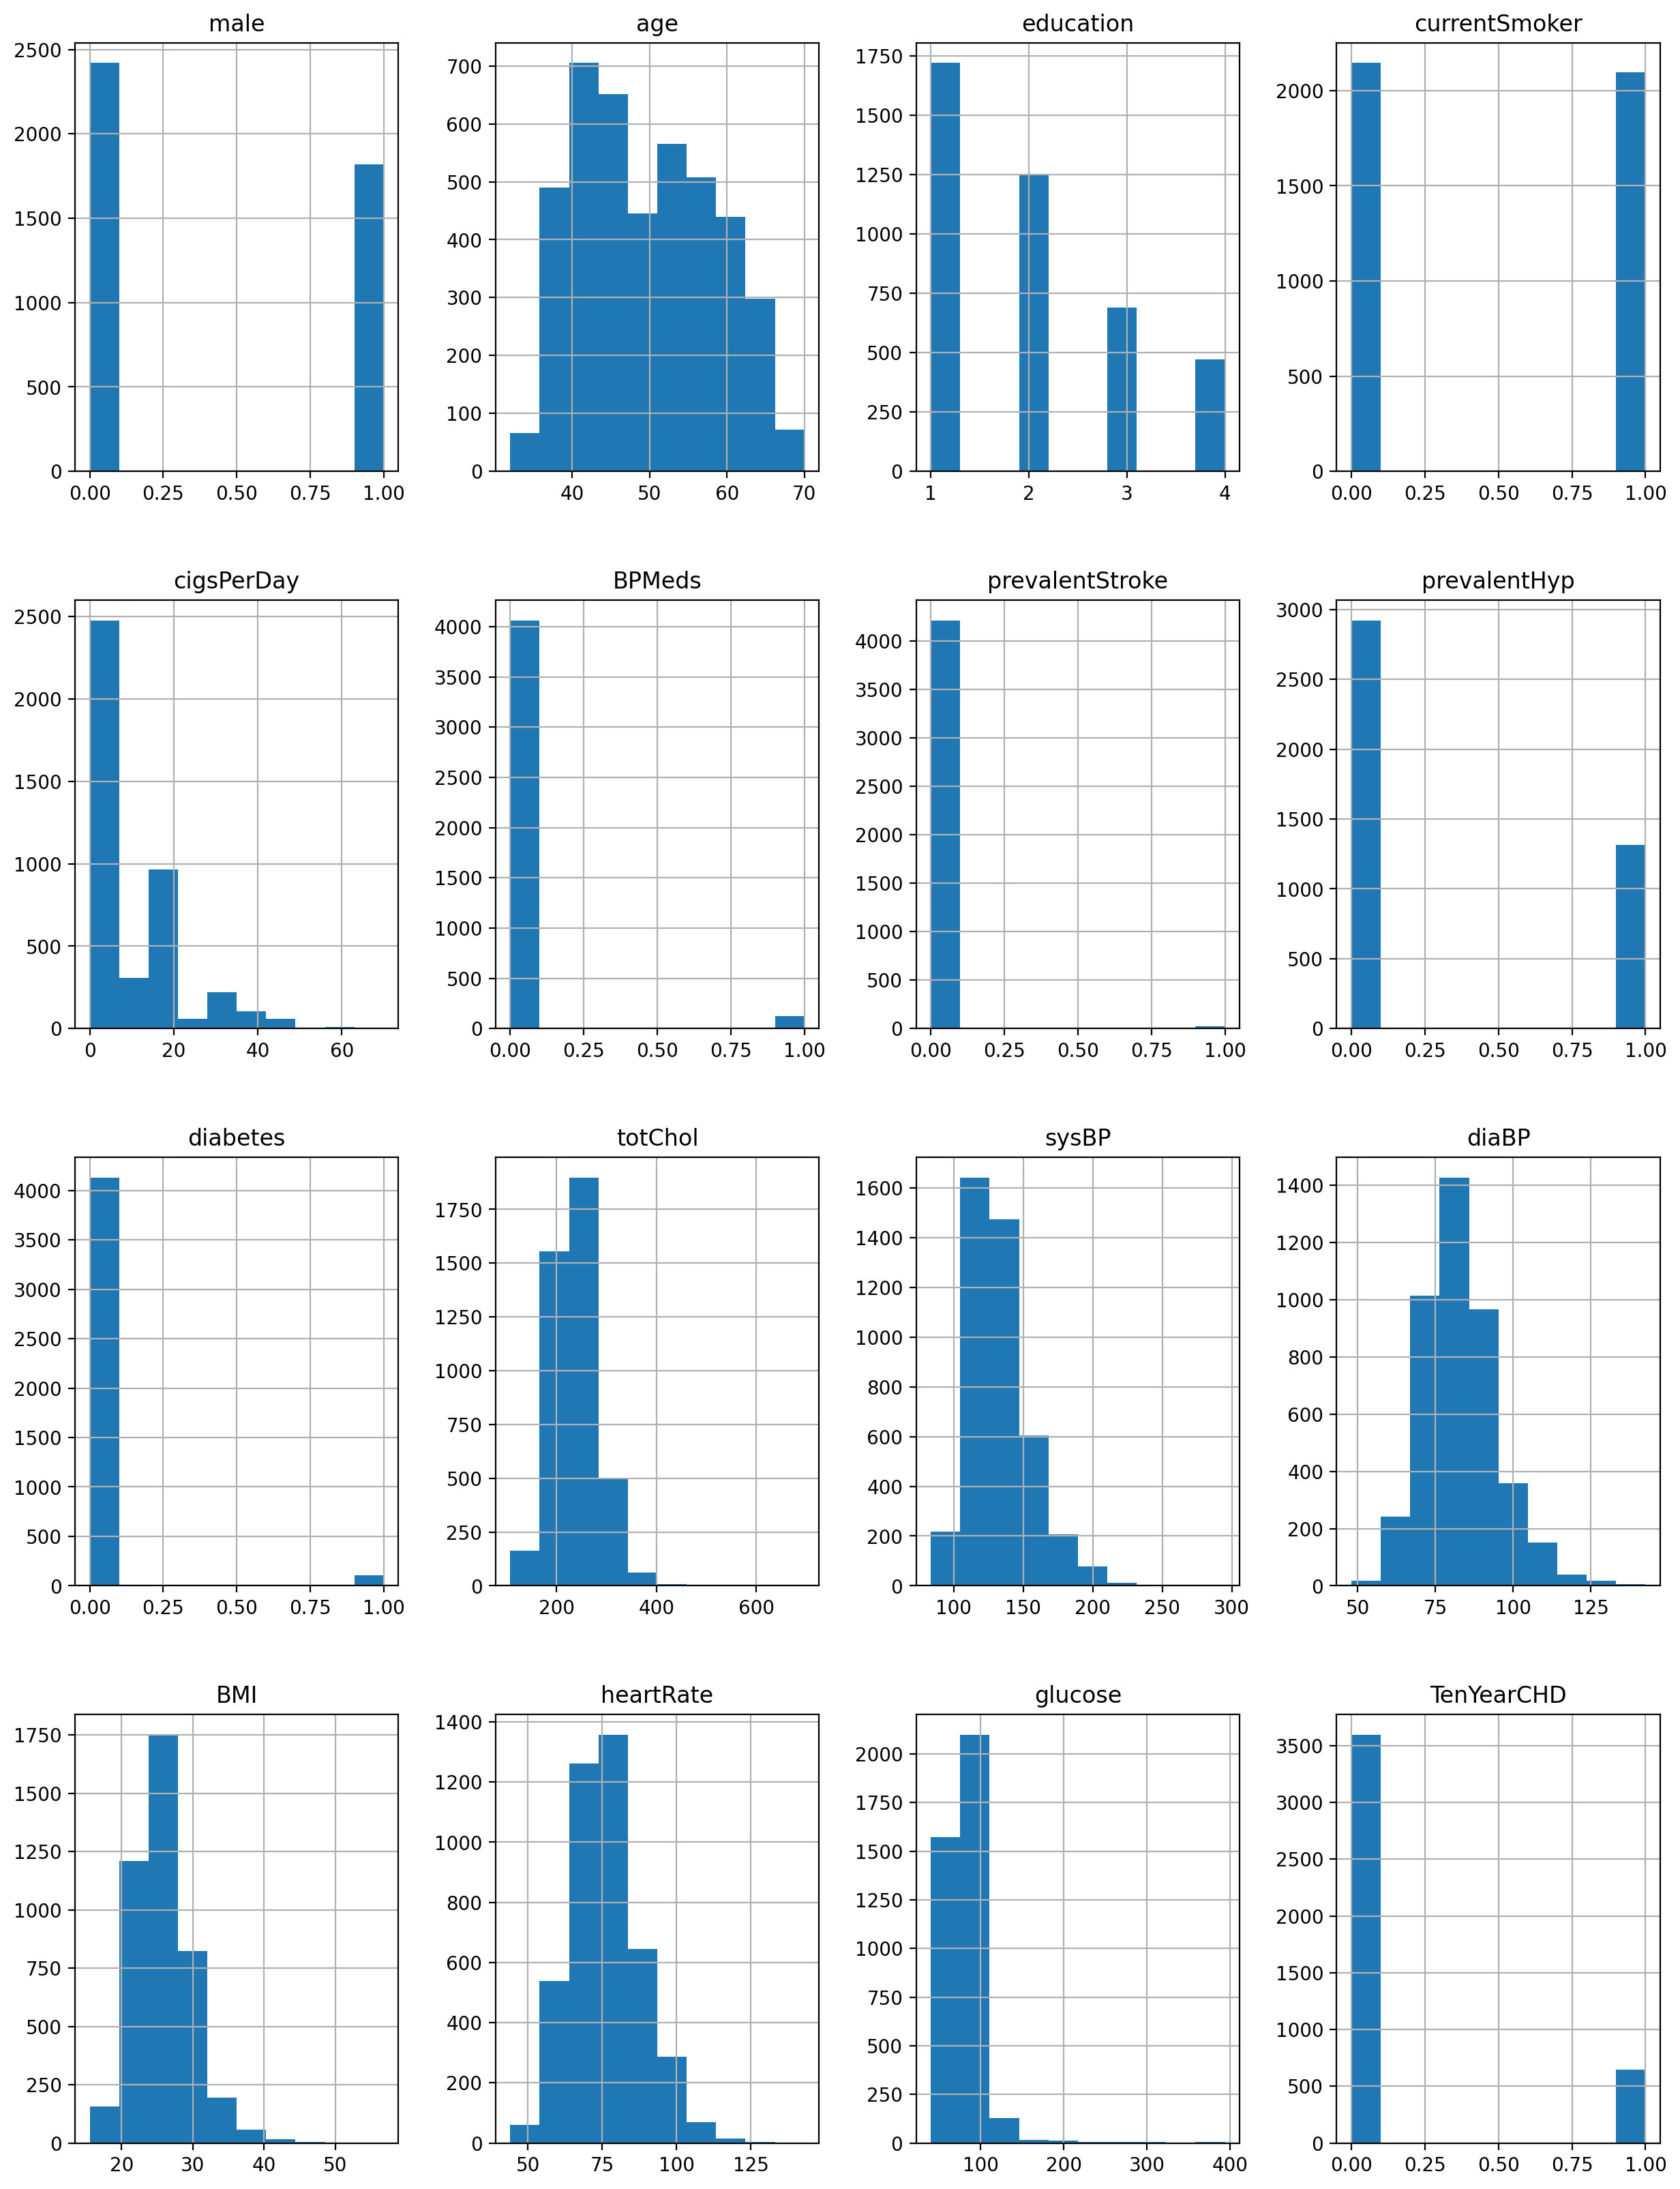

In [8]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<AxesSubplot:>

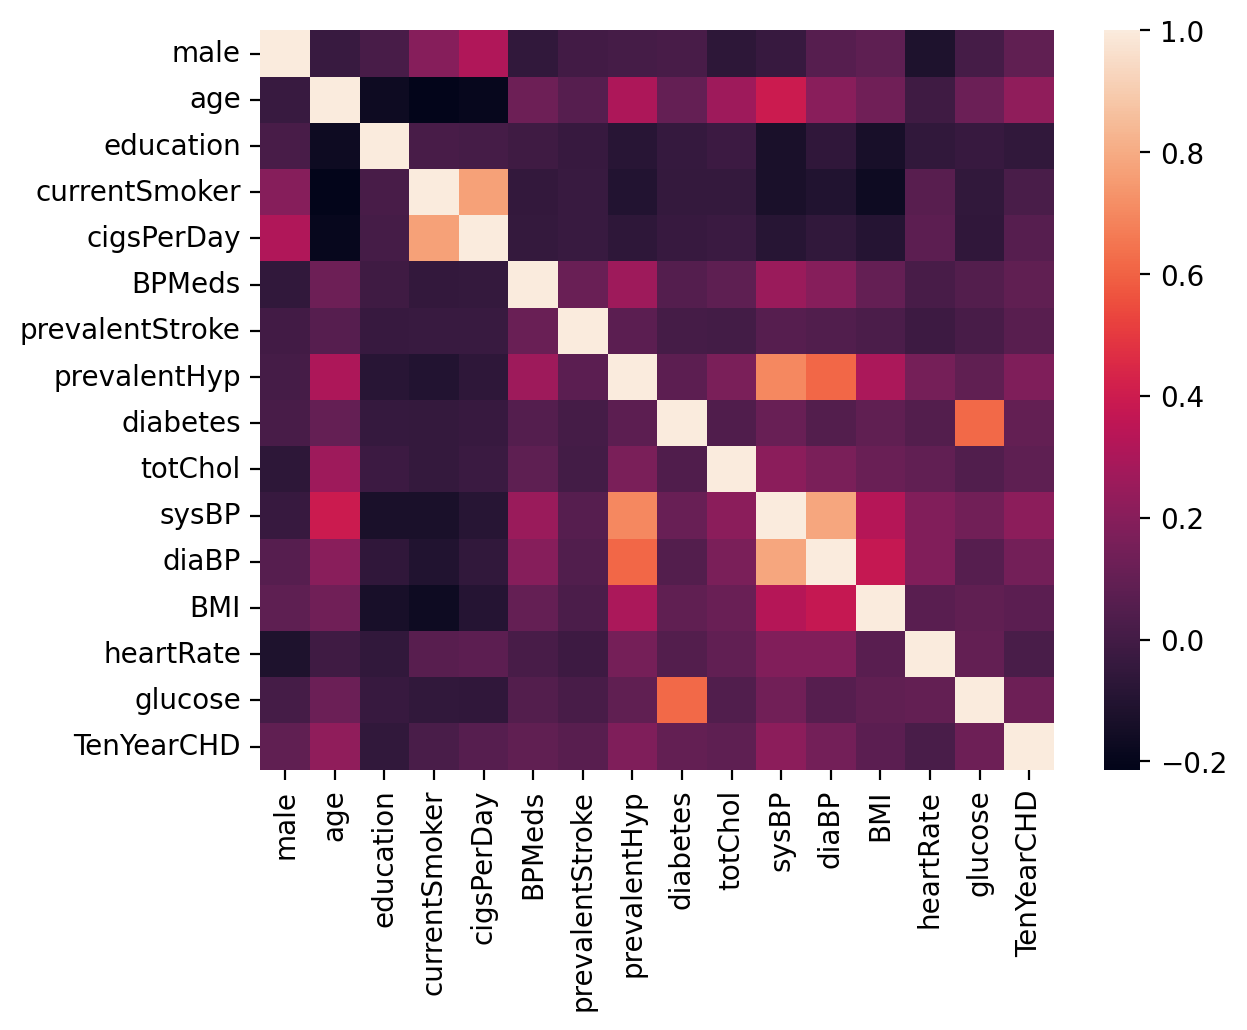

In [9]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
sns.heatmap(df_corr)

**Conclusions from Heatmap:**

We are dropping the column *education* because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [10]:
# Dropping columns education 
df = df.drop(['education'], axis=1)

In [11]:
# Checking for more missing data 
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Feature Selection *<a name="paragraph2"></a>*

In [13]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [14]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
9             sysBP  667.109932
13          glucose  402.409837
1               age  297.974980
8           totChol  252.958627
3        cigsPerDay  185.115196
10            diaBP  142.920436
6      prevalentHyp   82.342164
7          diabetes   31.711253
4            BPMeds   26.116583
0              male   19.178560
11              BMI   17.108210
5   prevalentStroke    8.480982
12        heartRate    3.635480
2     currentSmoker    0.904429

<Figure size 2000x500 with 0 Axes>

<AxesSubplot:xlabel='Specs', ylabel='Score'>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sysBP'),
  Text(1, 0, 'glucose'),
  Text(2, 0, 'age'),
  Text(3, 0, 'totChol'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'BPMeds'),
  Text(9, 0, 'male'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'prevalentStroke'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'currentSmoker')])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

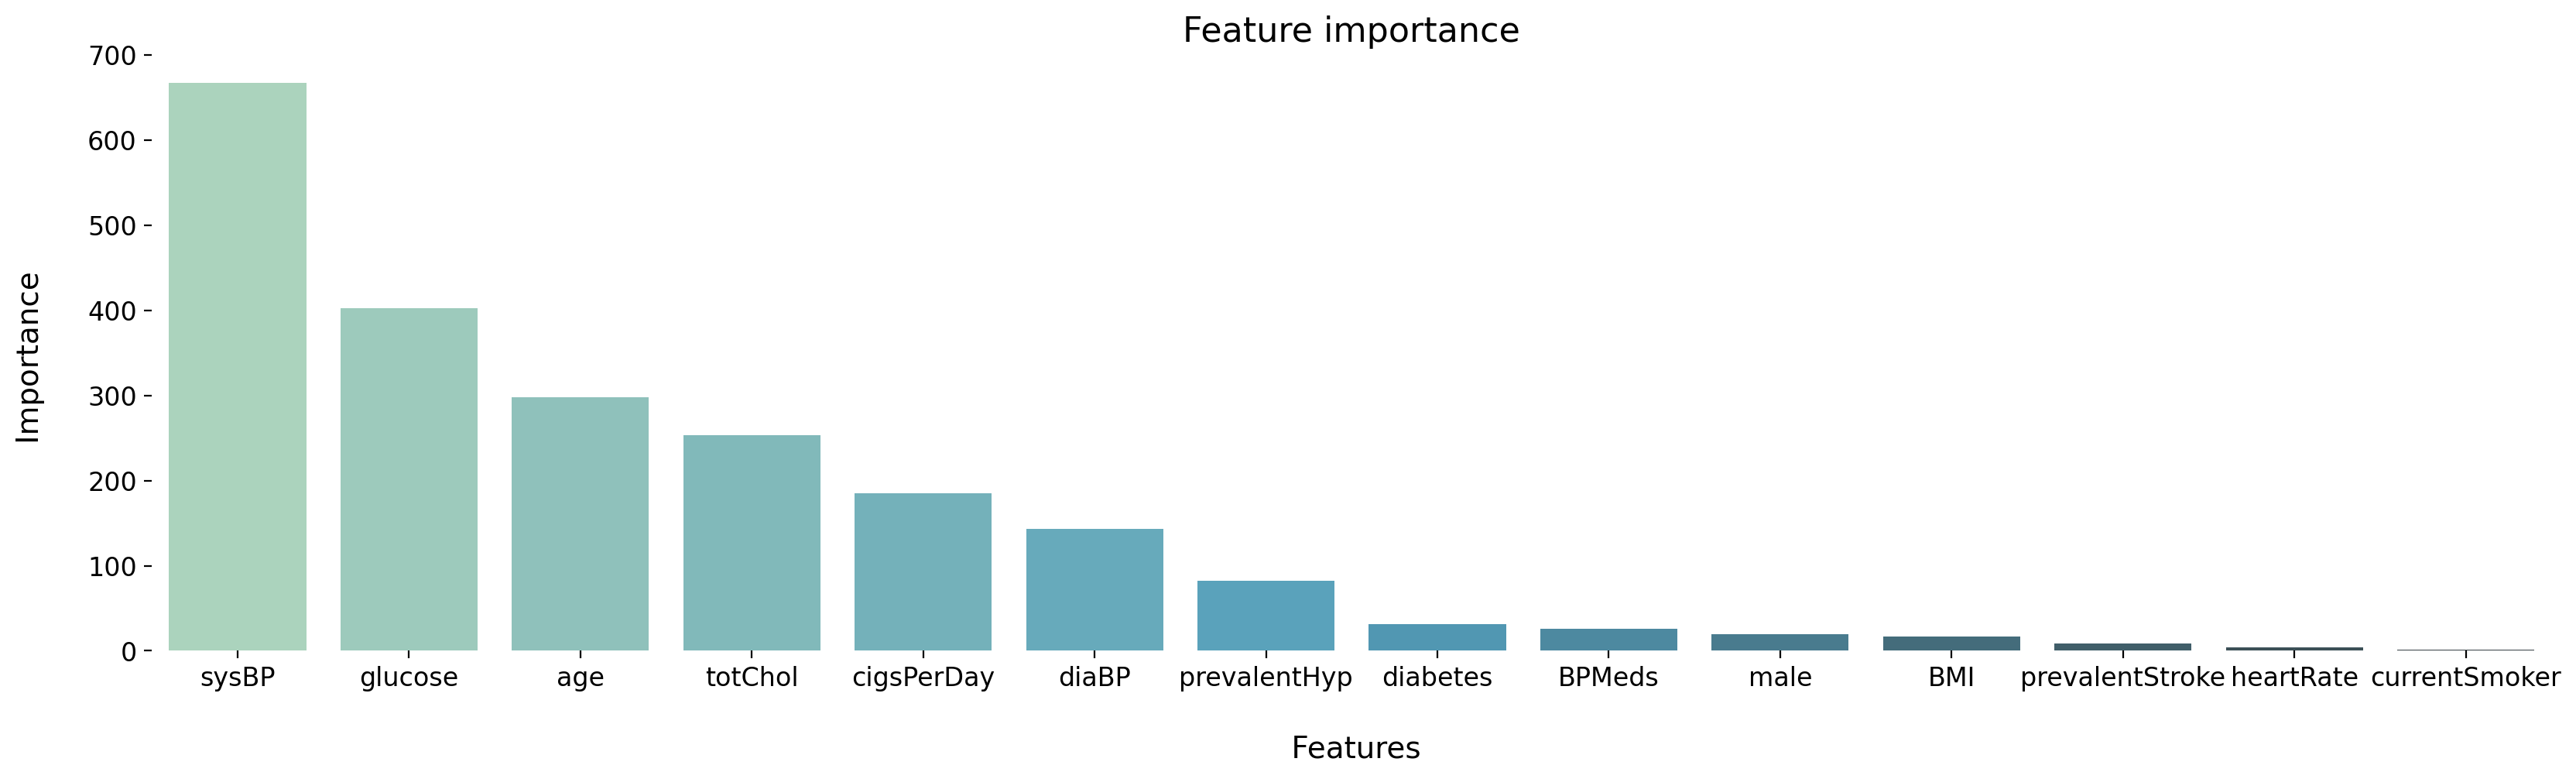

In [15]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

We will only keep those features that have the strongest relationship with the output variable. These features are:
- Systolic Blood Pressure
- Glucose
- Age
- Cholesterin
- Cigarettes per Day
- Diastolic Blood Pressure
- Hypertensive
- Diabetes
- Blood Pressure Medication
- Gender

In [17]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0         0.0   70.0             0         0   
1  121.0     76.0   46    250.0         0.0   81.0             0         0   
2  127.5     70.0   48    245.0        20.0   80.0             0         0   
3  150.0    103.0   61    225.0        30.0   95.0             1         0   
4  130.0     85.0   46    285.0        23.0   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

<AxesSubplot:>

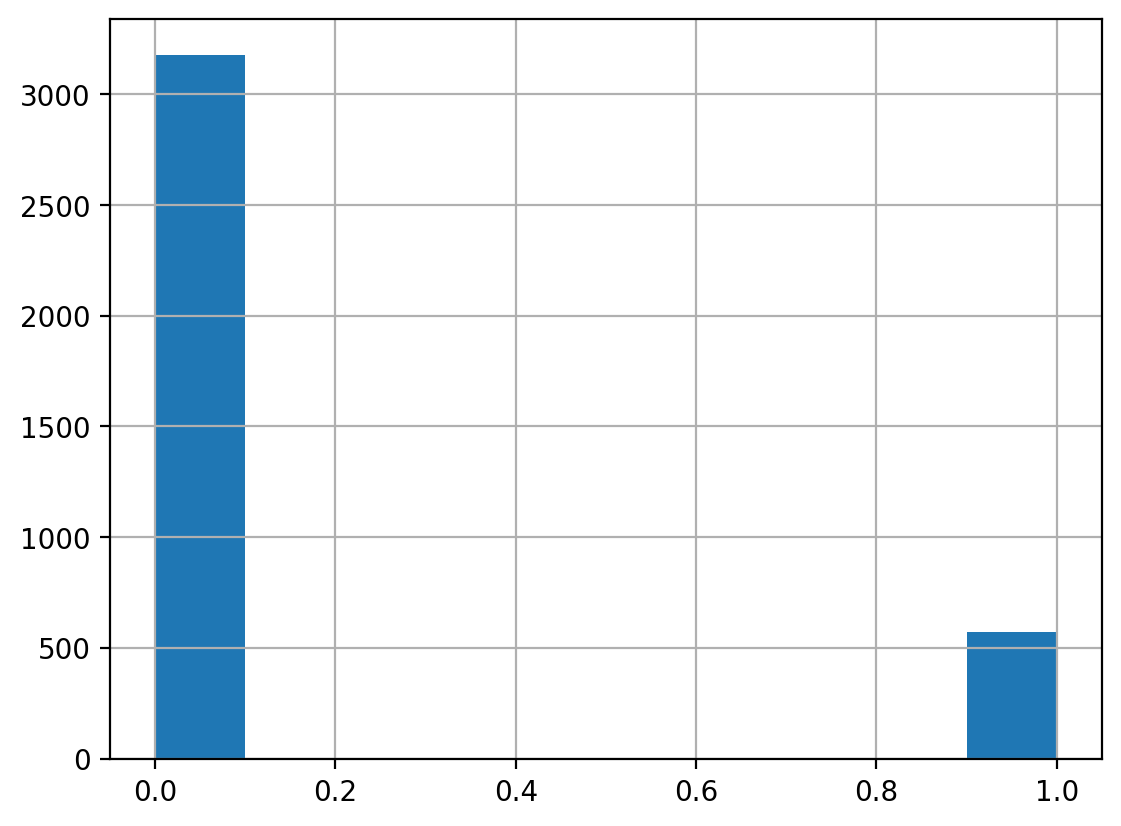

In [18]:
df['TenYearCHD'].hist()

In [19]:
df['cigsPerDay'].value_counts()

0.0     1919
20.0     664
30.0     196
15.0     187
10.0     125
5.0      103
9.0      103
3.0       85
40.0      71
1.0       63
43.0      49
25.0      48
35.0      19
6.0       17
2.0       16
7.0       11
60.0      10
8.0        9
4.0        9
17.0       7
18.0       7
23.0       6
11.0       5
50.0       4
13.0       3
45.0       3
12.0       3
16.0       3
19.0       2
38.0       1
29.0       1
70.0       1
14.0       1
Name: cigsPerDay, dtype: int64

<AxesSubplot:>

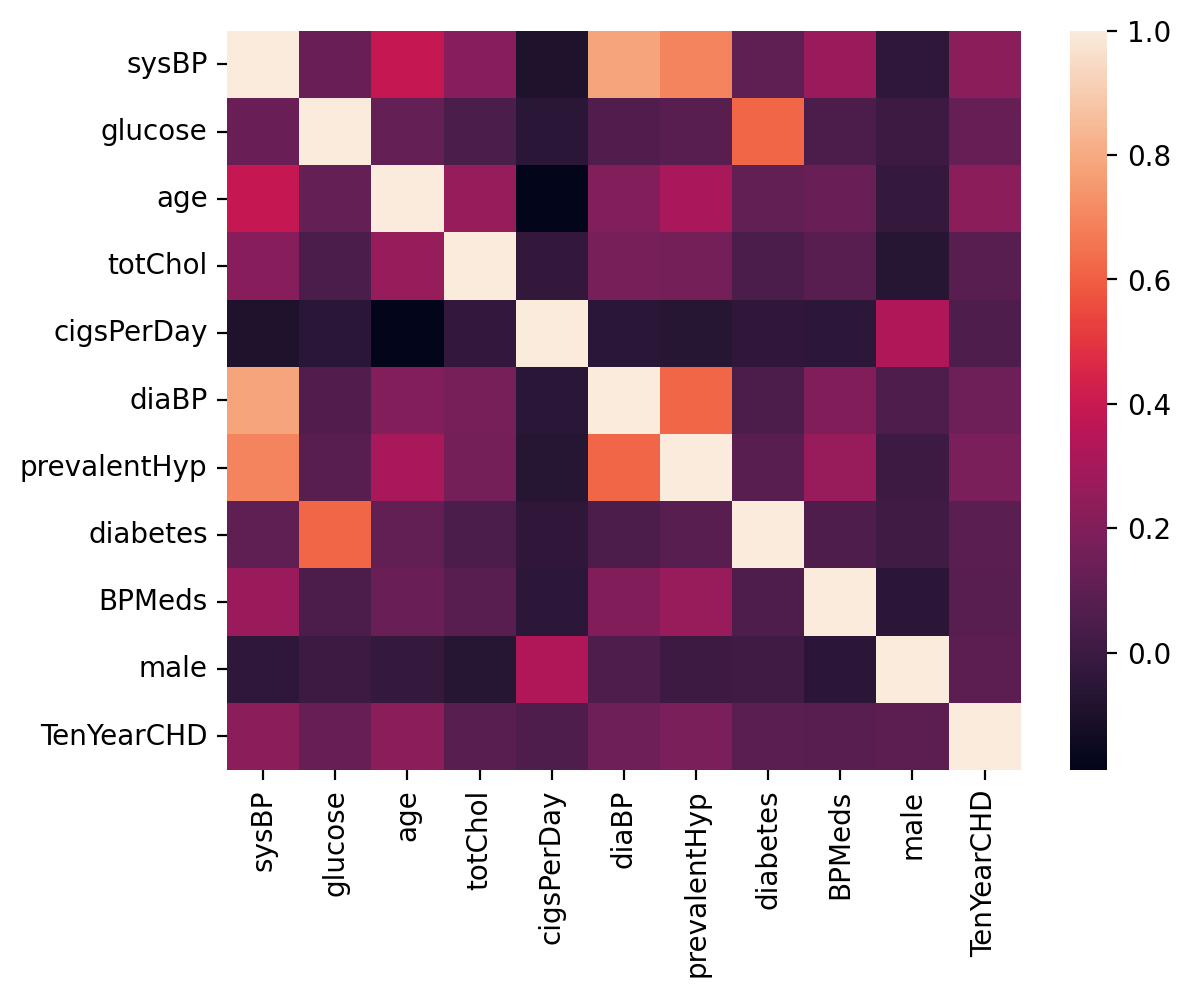

In [20]:
# Checking correlation again
df_corr = df.corr()
sns.heatmap(df_corr)

sysBP      glucose          age      totChol   cigsPerDay  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean    132.368435    81.880032    49.573447   236.928019     9.008531   
std      22.046522    23.882233     8.570204    44.611594    11.925097   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     144.000000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   696.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3751.000000   3751.000000  3751.000000  3751.000000  3751.000000   
mean     82.938550      0.311917     0.027193     0.030392     0.445215   
std      11.932779      0.463338     0.162666     0.171686     0.497056   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3751.000000  
mean      0.152493  
std       0.359546  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

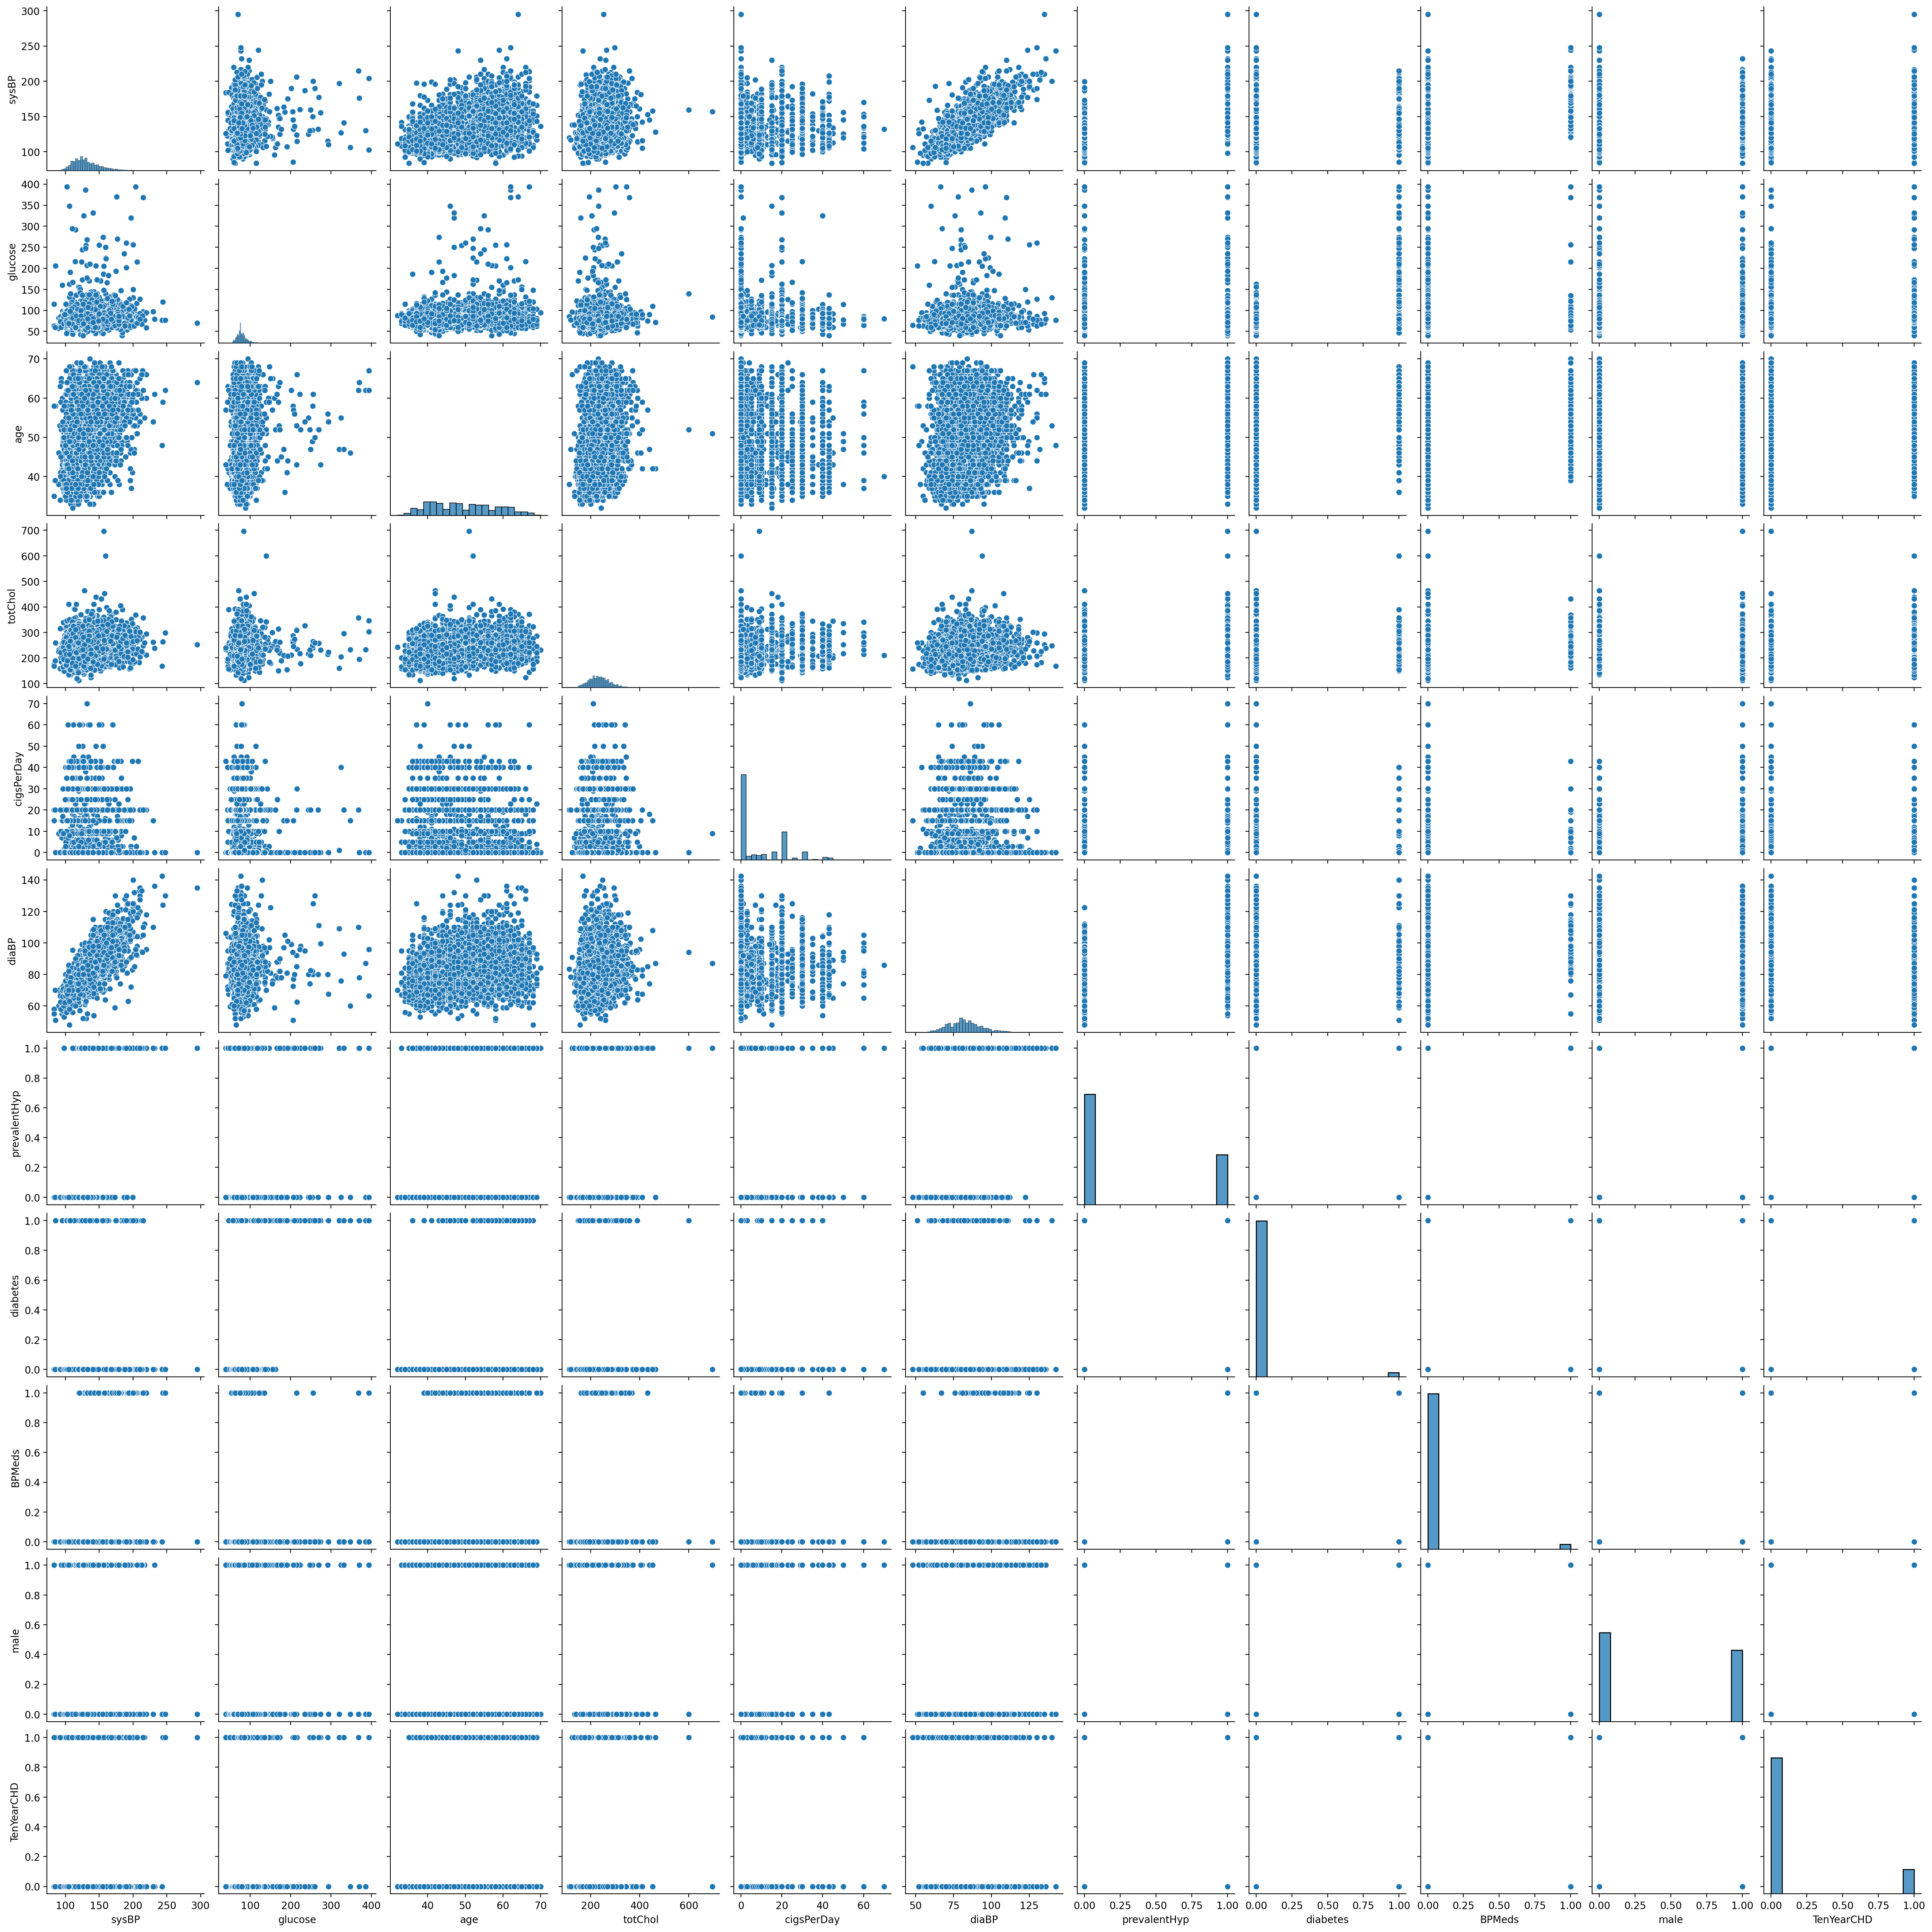

In [21]:
# Checking for outliers
df.describe()
sns.pairplot(df)

<AxesSubplot:xlabel='totChol'>

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
1111  159.5    140.0   52    600.0         0.0   94.0             1         1   
3160  157.0     84.0   51    696.0         9.0   87.0             1         0   

      BPMeds  male  TenYearCHD  
1111     0.0     0           1  
3160     0.0     1           0

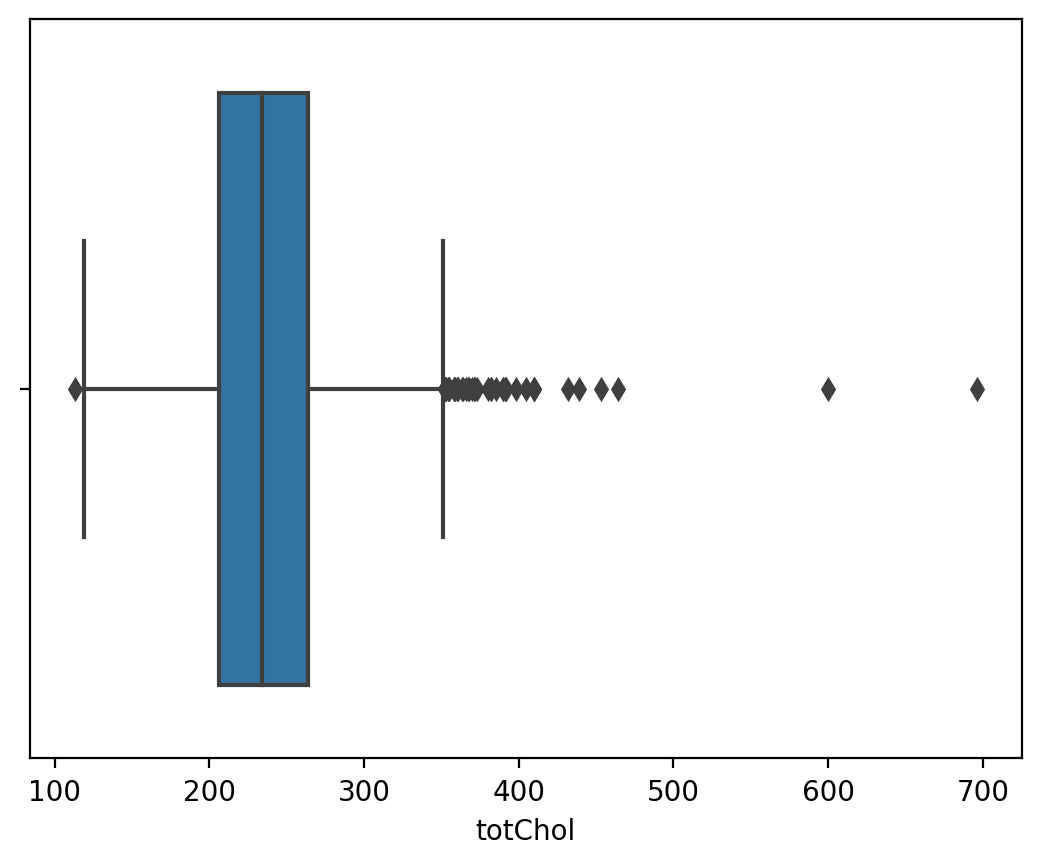

In [22]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

<AxesSubplot:xlabel='totChol'>

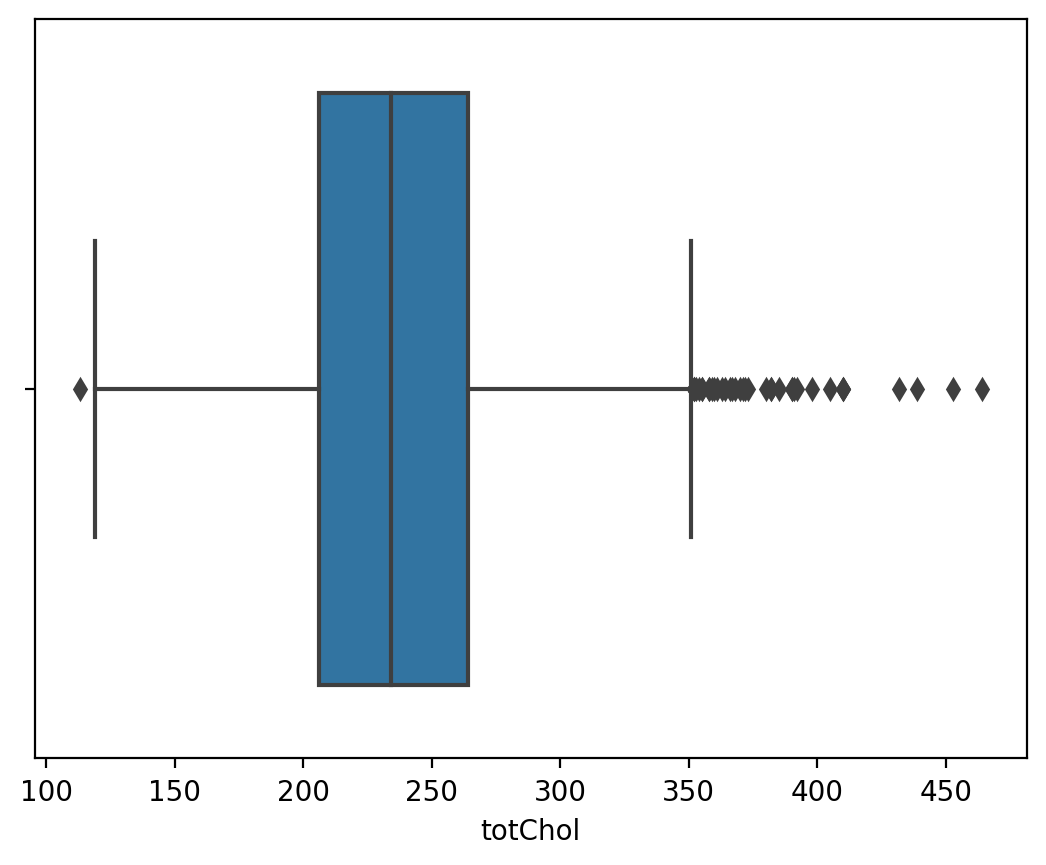

In [23]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [24]:
df_clean = df

## Feature Scaling <a name="paragraph2"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [25]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [26]:
df_scaled.describe()
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.230991     0.118260     0.462432     0.352447     0.128728   
std       0.104228     0.067429     0.225589     0.124179     0.170391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.087571     0.263158     0.264957     0.000000   
50%       0.210402     0.107345     0.447368     0.344729     0.000000   
75%       0.283688     0.132768     0.631579     0.430199     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.369677      0.311550     0.026941     0.030408     0.445185   
std       0.126290      0.463189     0.161931     0.171730     0.497053   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.285714      0.000000     0.000000     0.000000     0.000000   
50%       0.359788      0.000000     0.000000     0.000000     0.000000   
75%       0.444444      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean    132.354628    81.863964    49.572419   236.708722     9.010936   
std      22.044275    23.869703     8.572367    43.586786    11.927370   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     143.500000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   464.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean     82.934516      0.311550     0.026941     0.030408     0.445185   
std      11.934410      0.463189     0.161931     0.171730     0.497053   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Test - Train Split <a name="paragraph3"></a>

In [27]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [28]:
classifier_acc=[]
classifier_f1=[]
classifier_precision=[]
classifier_recall=[]
classifier_acc_pca=[]
classifier_f1_pca=[]
classifier_precision_pca=[]
classifier_recall_pca=[]

In [29]:
len(X_train)
len(X_test)

2999

750

## Resampling imbalanced Dataset <a name="paragraph4"></a>

Class 0: 3178
Class 1: 571
Proportion: 5.57 : 1


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

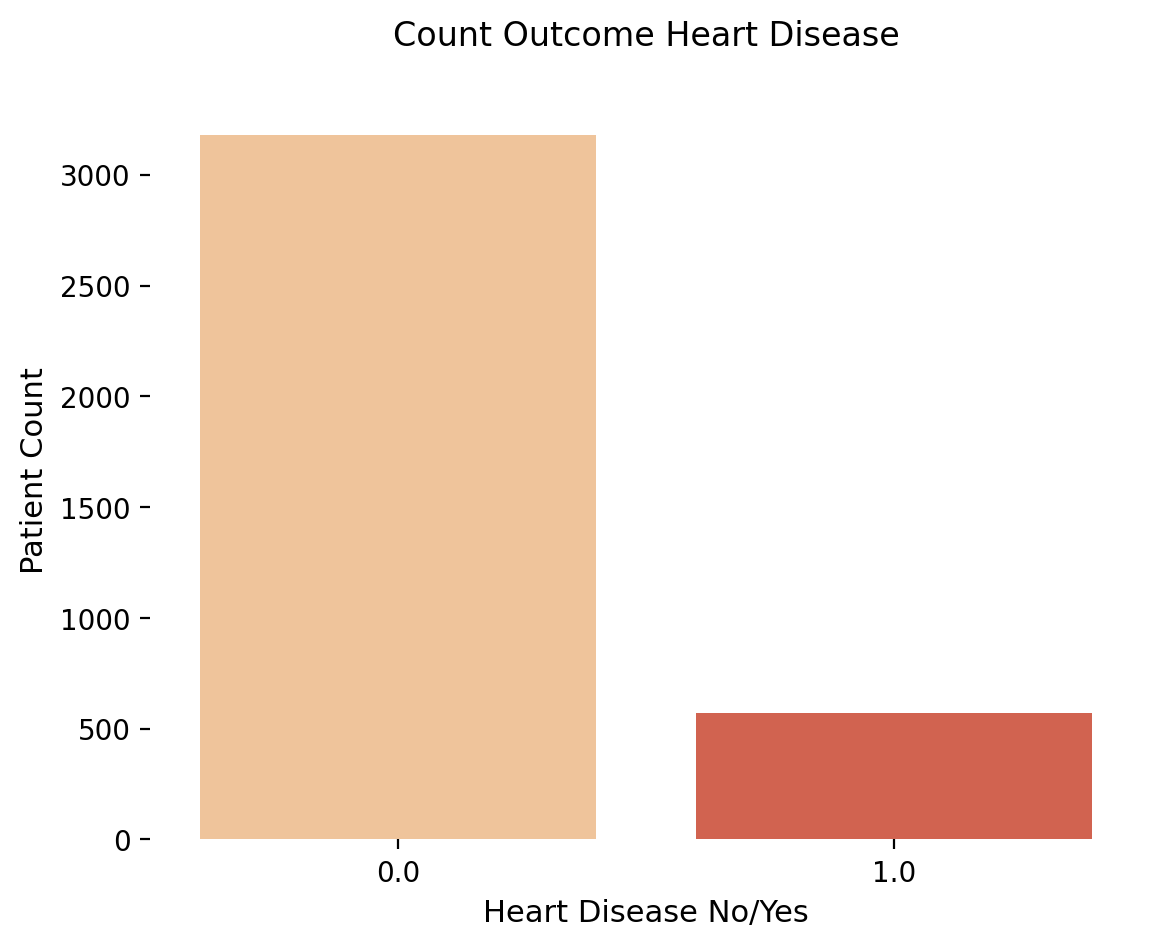

In [30]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


0.0    611
1.0    571
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

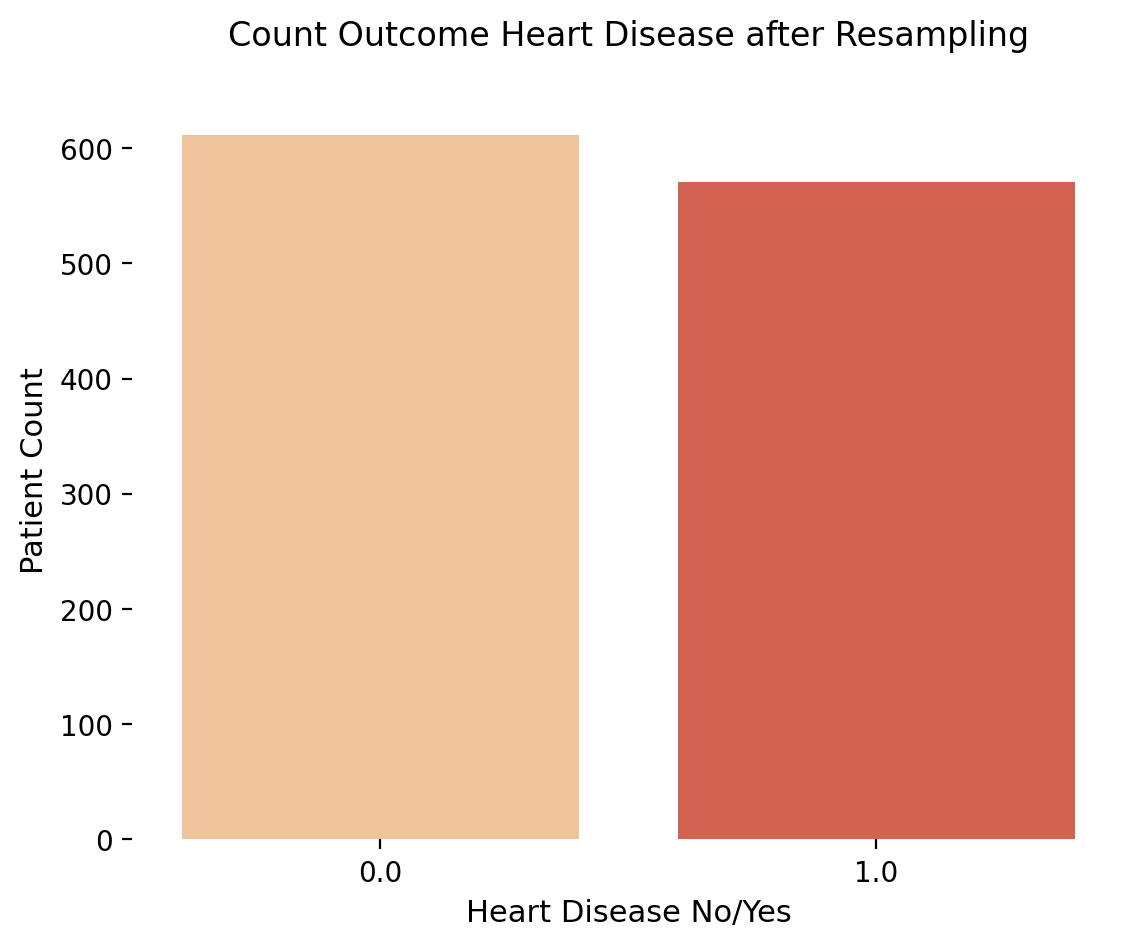

In [31]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

> ## **Model Pipeline** <a name="paragraph5"></a>

In [32]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))  


Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 65.73%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 64.80%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 70.27%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 80.00%


## Modelling & Evaluation (without Pipeline) <a name="paragraph6"></a>

### 1. Logistic Regression

In [33]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)
normalized_df_reg_pred = normalized_df_reg.predict(X_test)

acc = accuracy_score(y_test, normalized_df_reg_pred)
classifier_acc.append(round(acc,3)*100)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_reg_pred)
classifier_f1.append(round(f1,3)*100)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_reg_pred)
classifier_precision.append(round(precision,3)*100)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_reg_pred)
classifier_recall.append(round(recall,3)*100)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 65.7%
The f1 score for LogReg is: 37.2%
The precision score for LogReg is: 26.0%
The recall score for LogReg is: 65.0%


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

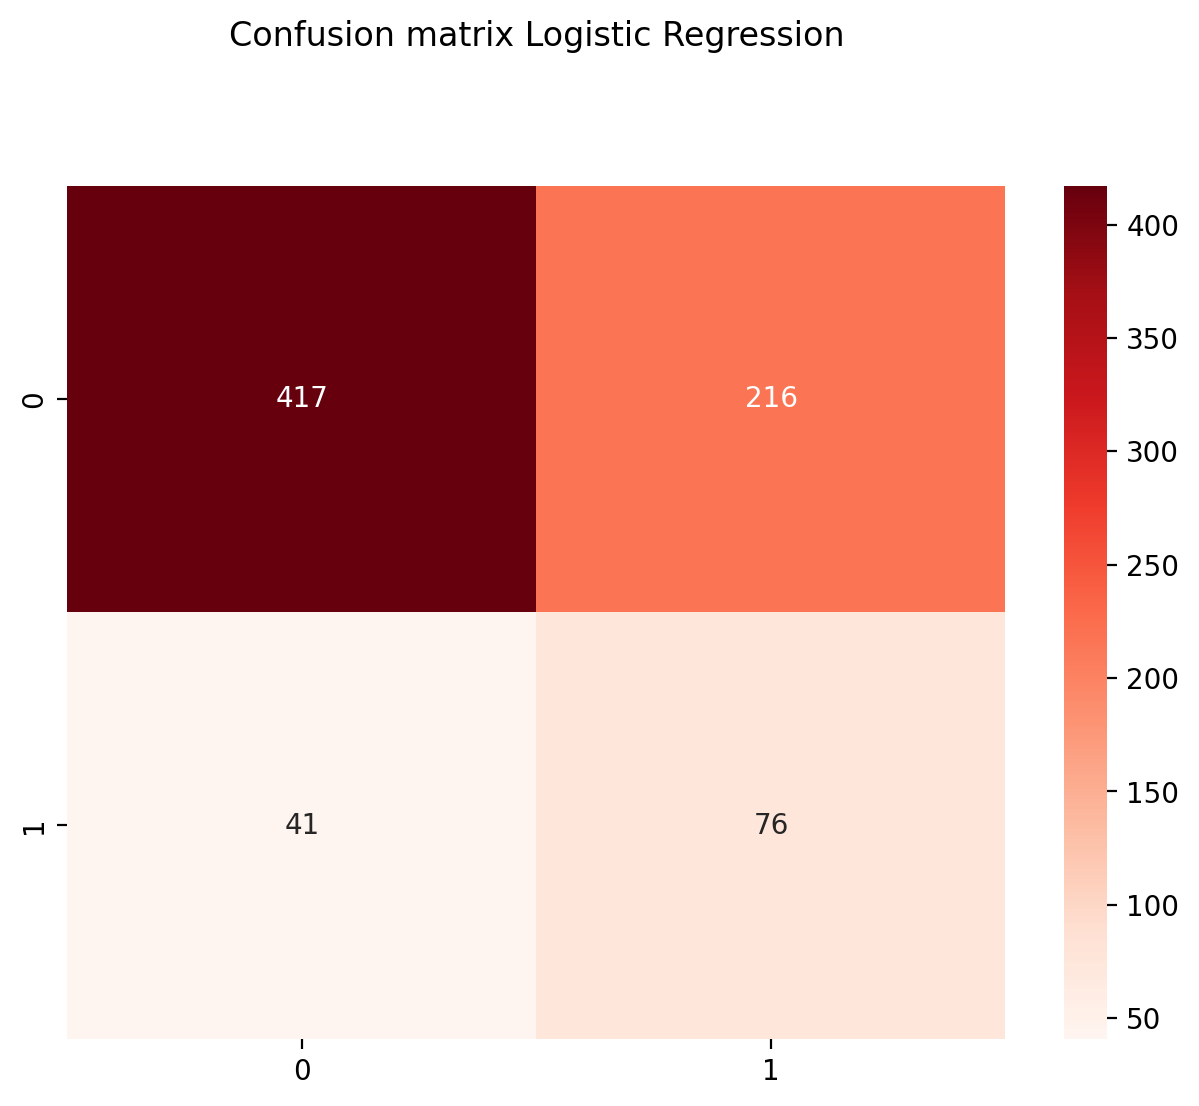

In [34]:

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

### 2. SVM

In [35]:
svm = SVC()

svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

acc = accuracy_score(y_test, normalized_df_svm_pred)
classifier_acc.append(round(acc,3)*100)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_svm_pred)
classifier_f1.append(round(f1,3)*100)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_svm_pred)
classifier_precision.append(round(precision,3)*100)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_svm_pred)
classifier_recall.append(round(recall,3)*100)
print(f"The recall score for SVM is: {round(recall,3)*100}%")


SVC()

The accuracy score for SVM is: 64.8%
The f1 score for SVM is: 37.7%
The precision score for SVM is: 26.1%
The recall score for SVM is: 68.4%


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix SVM\n')

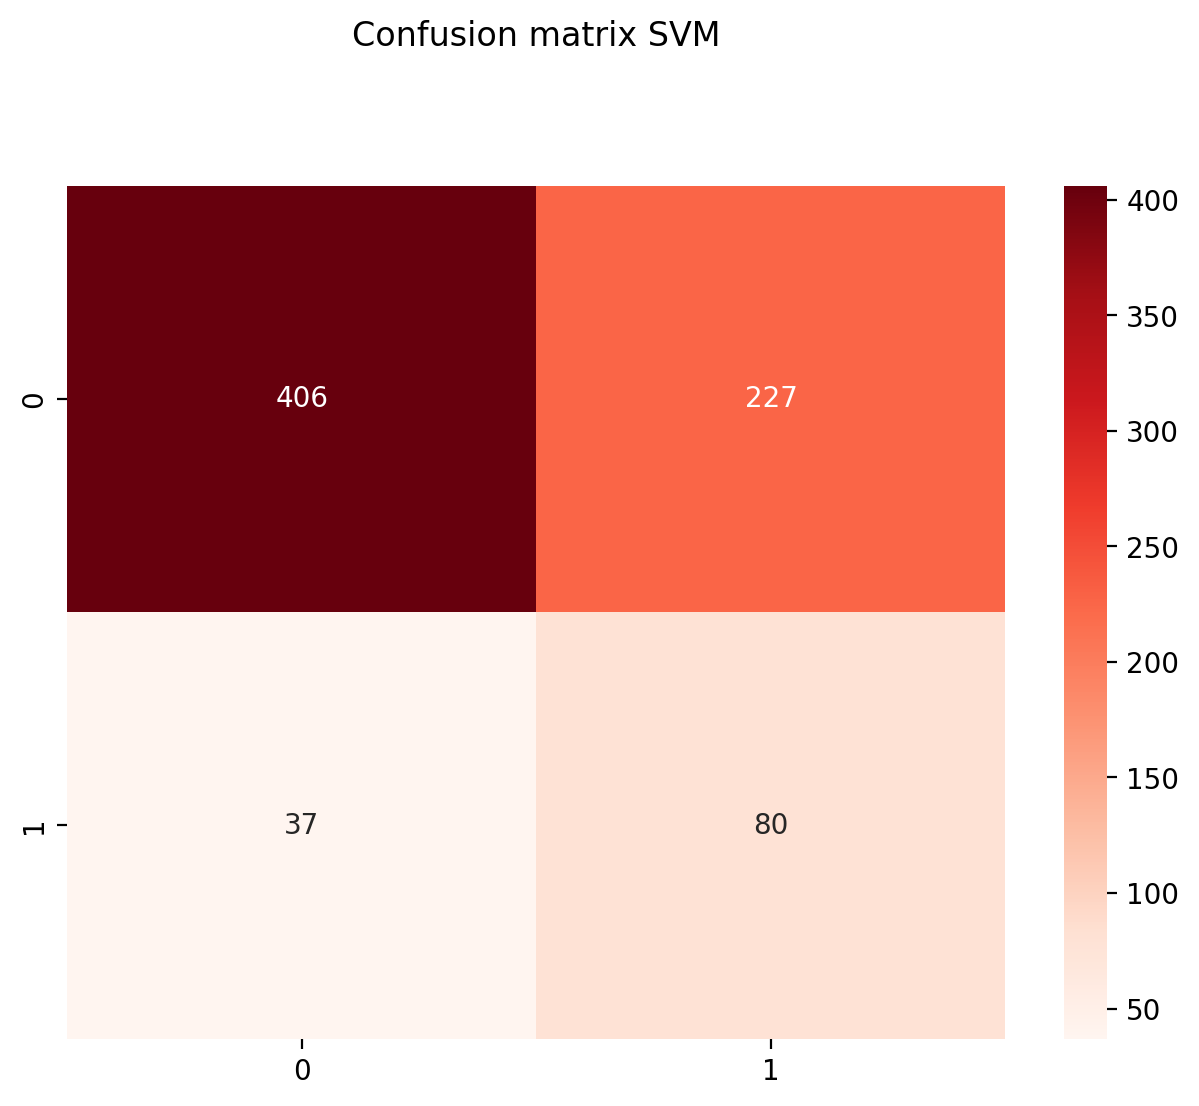

In [36]:
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

### 3. Decision Tree

In [37]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)


acc = accuracy_score(y_test, normalized_df_dtc_pred)
classifier_acc.append(round(acc,3)*100)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_dtc_pred)
classifier_f1.append(round(f1,3)*100)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_dtc_pred)
classifier_precision.append(round(precision,3)*100)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_dtc_pred)
classifier_recall.append(round(recall,3)*100)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 70.8%
The f1 score for DTC is: 51.7%
The precision score for DTC is: 34.8%
The recall score for DTC is: 100.0%


<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

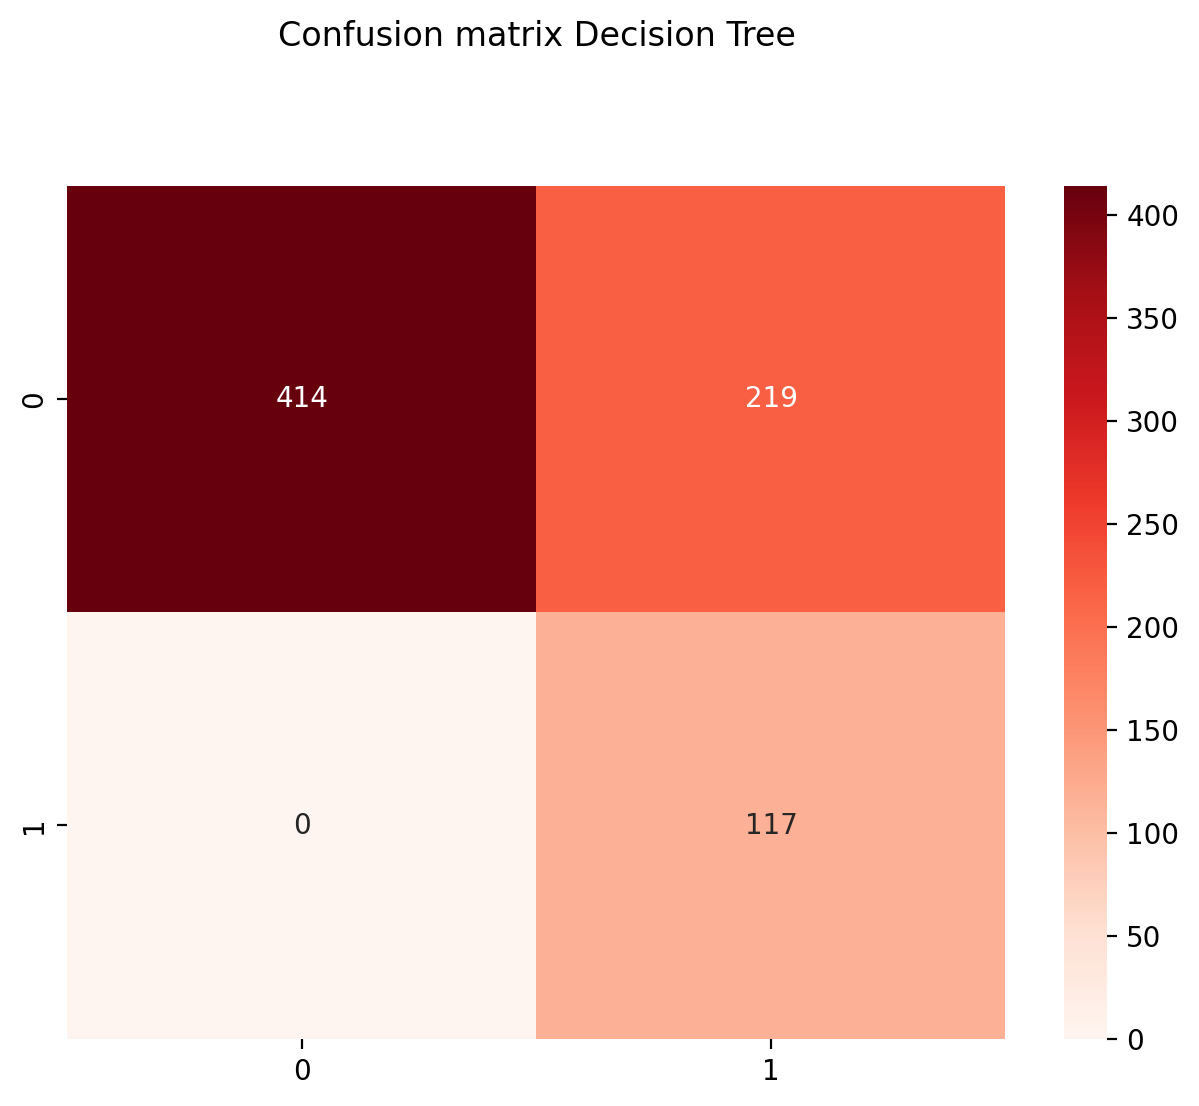

In [38]:
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


### 4. KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

normalized_df_knn_pred = knn.predict(X_test)

acc = accuracy_score(y_test, normalized_df_knn_pred)
classifier_acc.append(round(acc,3)*100)
classifier_acc_pca.append(round(acc,3)*100)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_knn_pred)
classifier_f1.append(round(f1,3)*100)
classifier_f1_pca.append(round(f1,3)*100)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_knn_pred)
classifier_precision.append(round(precision,3)*100)

print(f"The precision score for KNN is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_knn_pred)
classifier_recall.append(round(recall,3)*100)
classifier_recall_pca.append(round(recall,3)*100)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 80.0%
The f1 score for KNN is: 46.800000000000004%
The precision score for KNN is: 40.0%
The recall score for KNN is: 56.39999999999999%


### Result: The KNN model has the highest accuracy score

In [40]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  80.0 %
The accuracy score of the training data is:  79.19 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

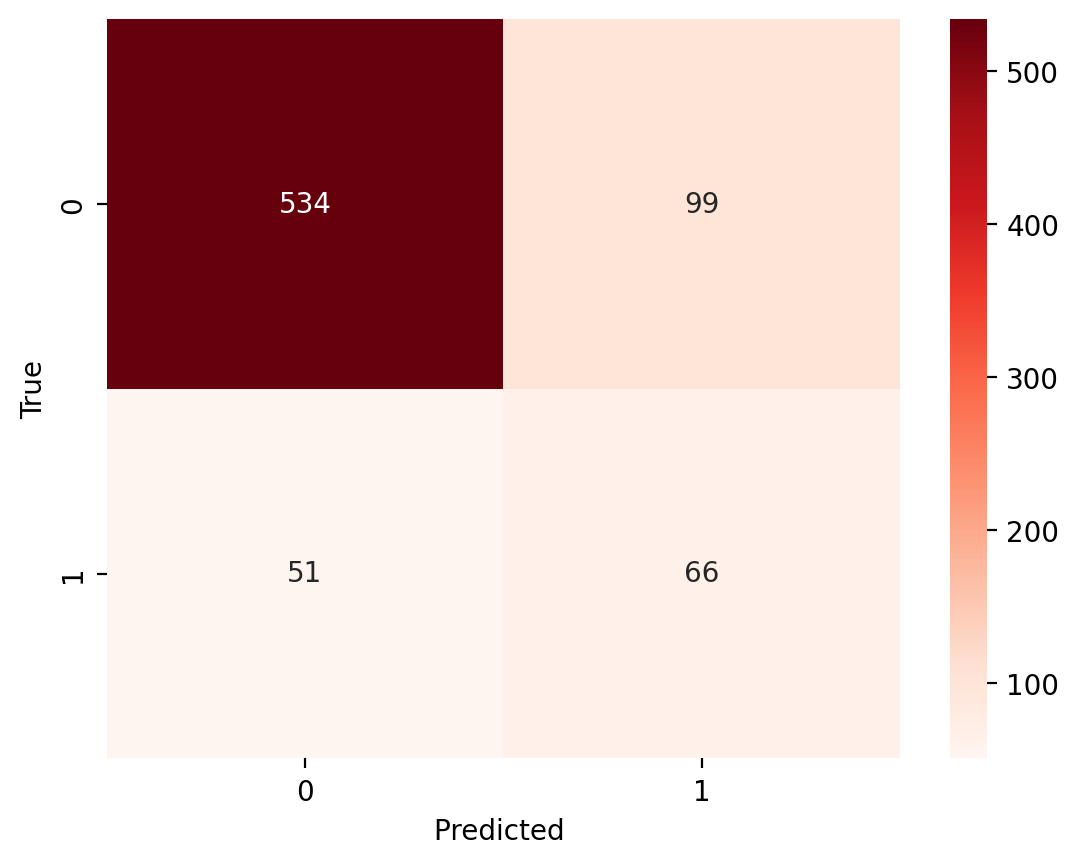

In [41]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

In [42]:
import pandas as pd

In [43]:
table=pd.DataFrame()

In [44]:
table.index = ['Logistic Regression','SupportVectorMachine','Decision Tree Classifier','K nearest Neighbors']

In [45]:
table

Empty DataFrame
Columns: []
Index: [Logistic Regression, SupportVectorMachine, Decision Tree Classifier, K nearest Neighbors]

In [46]:
table['Accuracy']=classifier_acc
table['F1']=classifier_f1
table['Precision']=classifier_precision
table['Recall']=classifier_recall

In [47]:
table

Accuracy    F1  Precision  Recall
Logistic Regression           65.7  37.2       26.0    65.0
SupportVectorMachine          64.8  37.7       26.1    68.4
Decision Tree Classifier      70.8  51.7       34.8   100.0
K nearest Neighbors           80.0  46.8       40.0    56.4

# BAGGING

In [48]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [49]:
y=df['TenYearCHD']

In [50]:
clf1 = DecisionTreeClassifier(criterion='entropy') # base learner 1
clf2 = LogisticRegression( )    # base learner 2
clf3=SVC()
clf4=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
# bagging learner 1
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=50, max_samples=0.8, max_features=0.8)
# bagging learner 2
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=50, max_samples=0.8, max_features=0.8)

# bagging learner 3
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=50, max_samples=0.8, max_features=0.8)
# bagging learner 4
bagging4 = BaggingClassifier(base_estimator=clf4, n_estimators=50, max_samples=0.8, max_features=0.8)

In [51]:
label = ['dt', 'LR','svc','KNN' ,'Bagging Tree', 'Bagging LR','Bagging SVC','Bagging KNN']
clf_list = [clf1, clf2,clf3,clf4, bagging1, bagging2,bagging3,bagging4]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=4, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3),label))

Accuracy:   (0.7522, 0.011, 'dt')
Accuracy:   (0.8538, 0.001, 'LR')
Accuracy:   (0.8474, 0.001, 'svc')
Accuracy:   (0.8317, 0.008, 'KNN')
Accuracy:   (0.8469, 0.002, 'Bagging Tree')
Accuracy:   (0.8498, 0.0, 'Bagging LR')
Accuracy:   (0.8482, 0.0, 'Bagging SVC')
Accuracy:   (0.8493, 0.002, 'Bagging KNN')


# BOOSTING

In [52]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf1 = SVC()
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [53]:
#Ensemble Size
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
    



<Figure size 640x480 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Ensemble Size')

Text(0.5, 1.0, 'AdaBoost Ensemble')

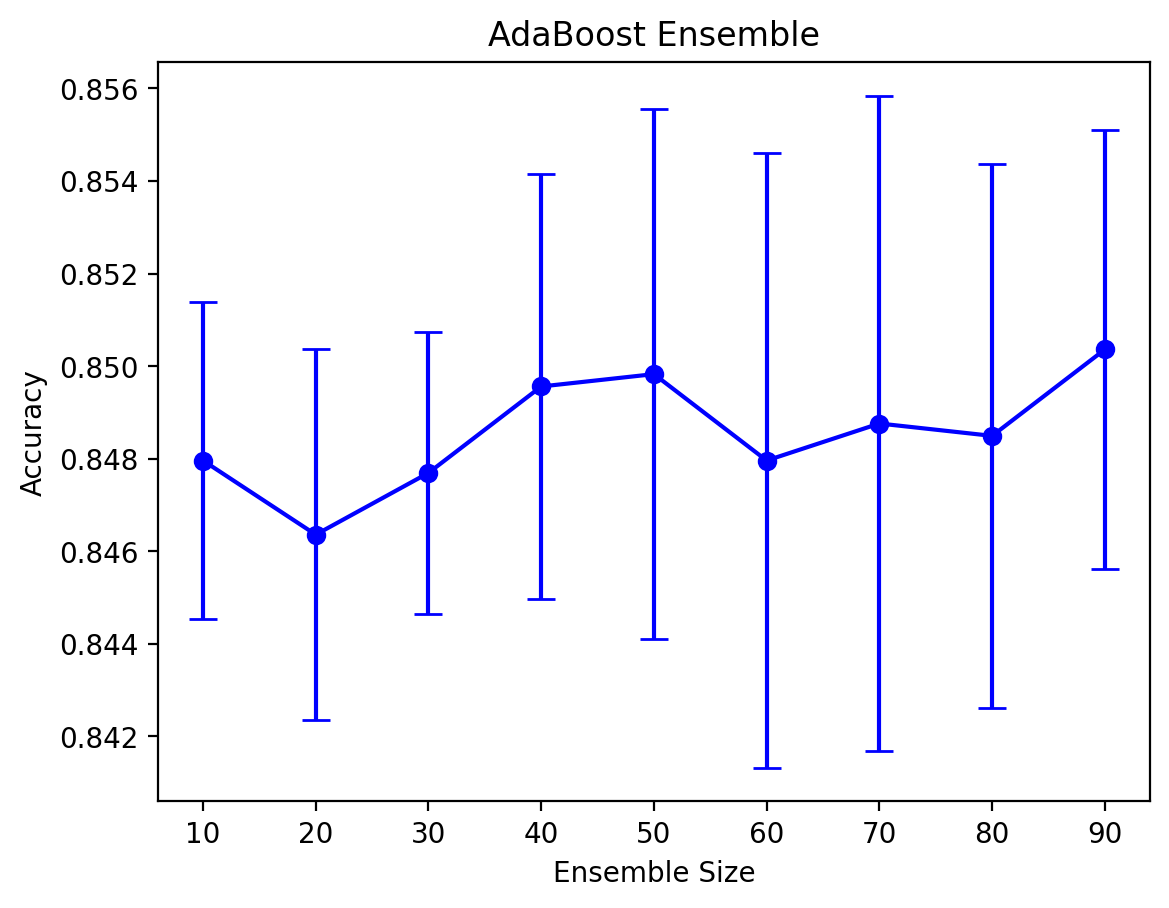

In [54]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

In [55]:
bg_clf1_cv_mean = []
bg_clf1_cv_std = []
for n_est in num_est:
    ada_clf1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=n_est)
    scores = cross_val_score(ada_clf1, X, y, cv=3, scoring='accuracy')
    bg_clf1_cv_mean.append(scores.mean())
    bg_clf1_cv_std.append(scores.std())

In [56]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

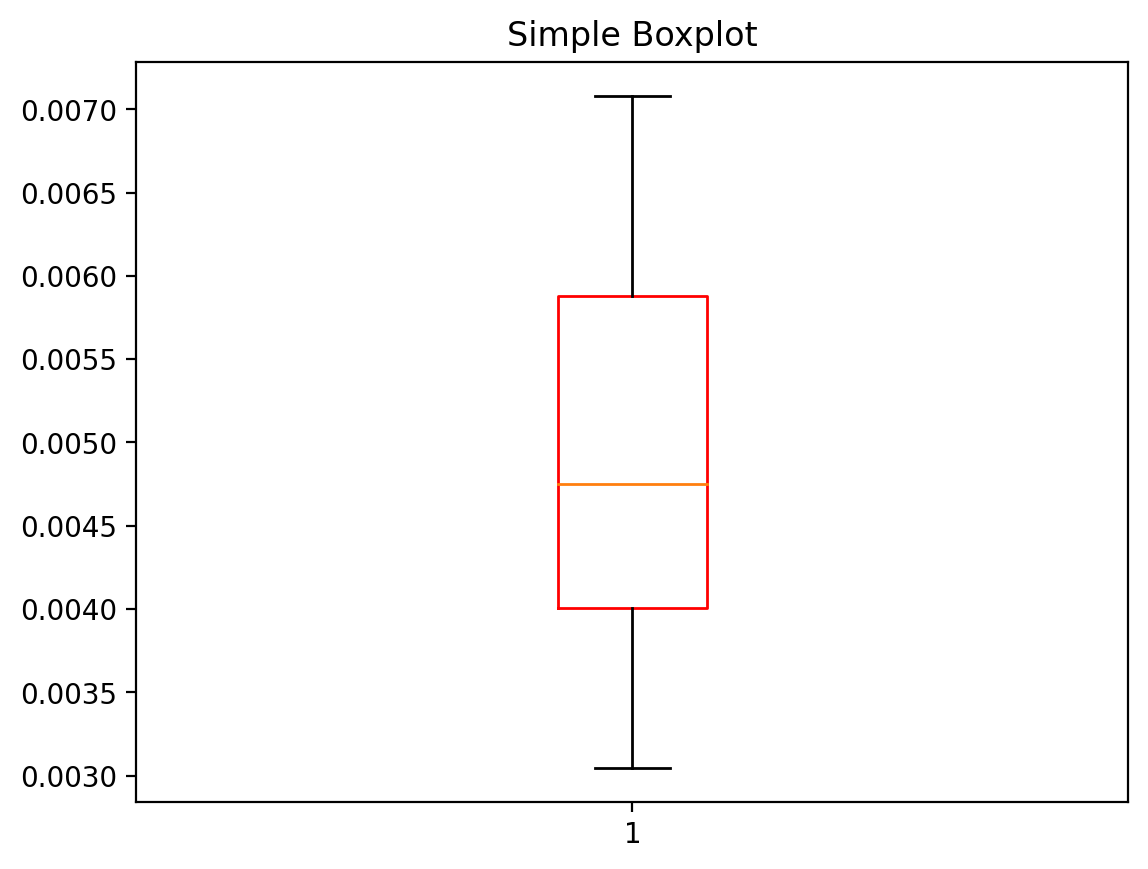

In [57]:
plt.boxplot(bg_clf_cv_std, boxprops=dict(color='red'))
plt.title('Simple Boxplot');

In [58]:
# compare ensemble to each baseline classifier
from numpy import mean, std

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingRegressor, StackingClassifier, BaggingClassifier, AdaBoostClassifier 
from matplotlib import pyplot


In [59]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models: level0 models
    level0 = list()
    level0.append(('lr', LogisticRegression())) # model A
    level0.append(('dt', DecisionTreeClassifier())) # model B
    level0.append(('knn', KNeighborsClassifier())) # model C
    level0.append(('svc', SVC())) # model D
    # define meta learner model: level 1
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [60]:

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['dt'] = DecisionTreeClassifier()
    models['KNN'] =KNeighborsClassifier()
    models['SVC'] =SVC()
    models['stacking'] = get_stacking()
    return models

In [61]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
	return scores

In [62]:
y=df['TenYearCHD']

In [63]:
models = get_models()
models.items()

dict_items([('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier()), ('SVC', SVC()), ('stacking', StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression()))])

In [64]:
# get the models to evaluate
import warnings
warnings.filterwarnings("ignore")
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>lr 0.853 (0.003)
>dt 0.748 (0.015)
>KNN 0.831 (0.005)
>SVC 0.847 (0.001)
>stacking 0.853 (0.003)


{'whiskers': [<matplotlib.lines.Line2D at 0x250c0052d90>,
 'caps': [<matplotlib.lines.Line2D at 0x250c005e370>,
 'boxes': [<matplotlib.lines.Line2D at 0x250c0046910>,
 'medians': [<matplotlib.lines.Line2D at 0x250c005e910>,
 'fliers': [<matplotlib.lines.Line2D at 0x250c005eeb0>,
 'means': [<matplotlib.lines.Line2D at 0x250c005ebe0>,
  <matplotlib.lines.Line2D at 0x250c009baf0>]}

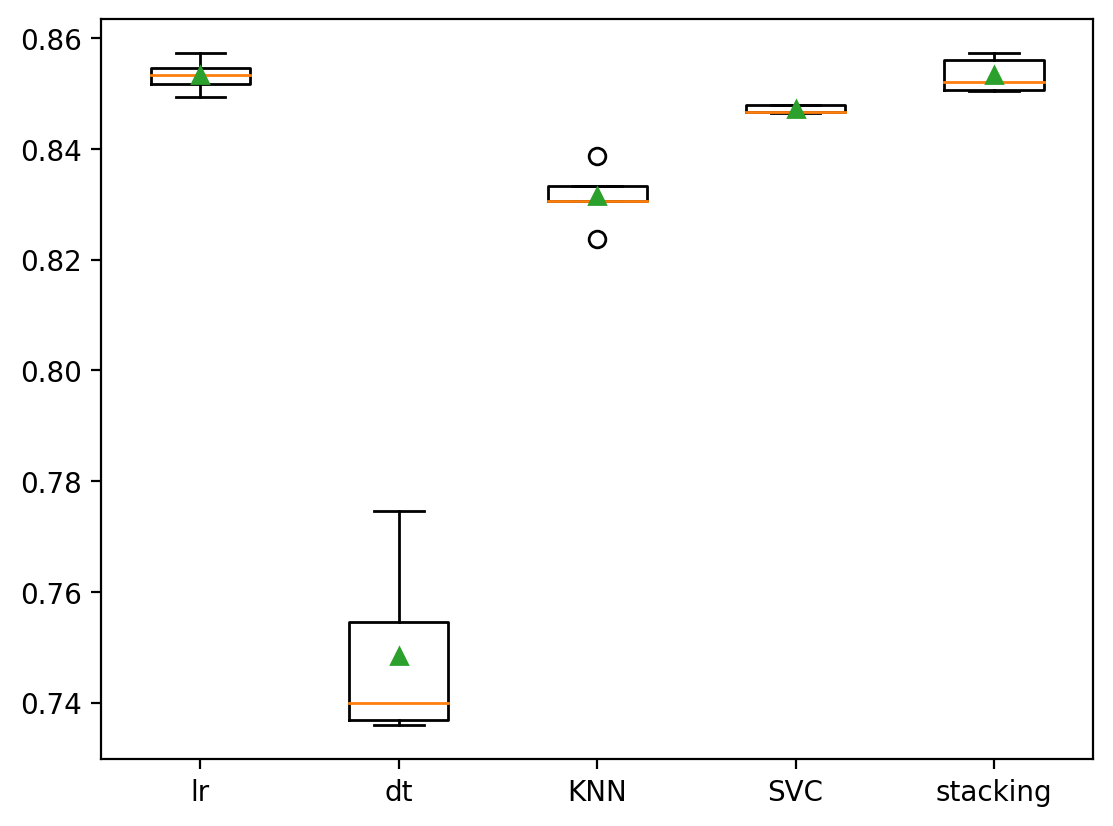

In [65]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# PART 2- REGRESSION 

In [66]:
# clarify what is y and what is x label
y = df_scaled['totChol']
X = df_scaled.drop(['totChol'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor



# Random Forest Regressor

In [68]:

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [69]:
reg =RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = reg.predict(X_test)

In [71]:
mean_squared_error(y_test, y_pred, squared=False)

0.12418990414908636

# Gradien Boosting Regressor

In [72]:
reg = GradientBoostingRegressor()

reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [73]:
y_pred = reg.predict(X_test)

In [74]:
mean_squared_error(y_test, y_pred, squared=False)

0.12015306556716734

# Ensemble meta-estimator

In [75]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

GradientBoostingRegressor(random_state=1)

RandomForestRegressor(random_state=1)

LinearRegression()

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [76]:
VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [77]:
xt = X[:50]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

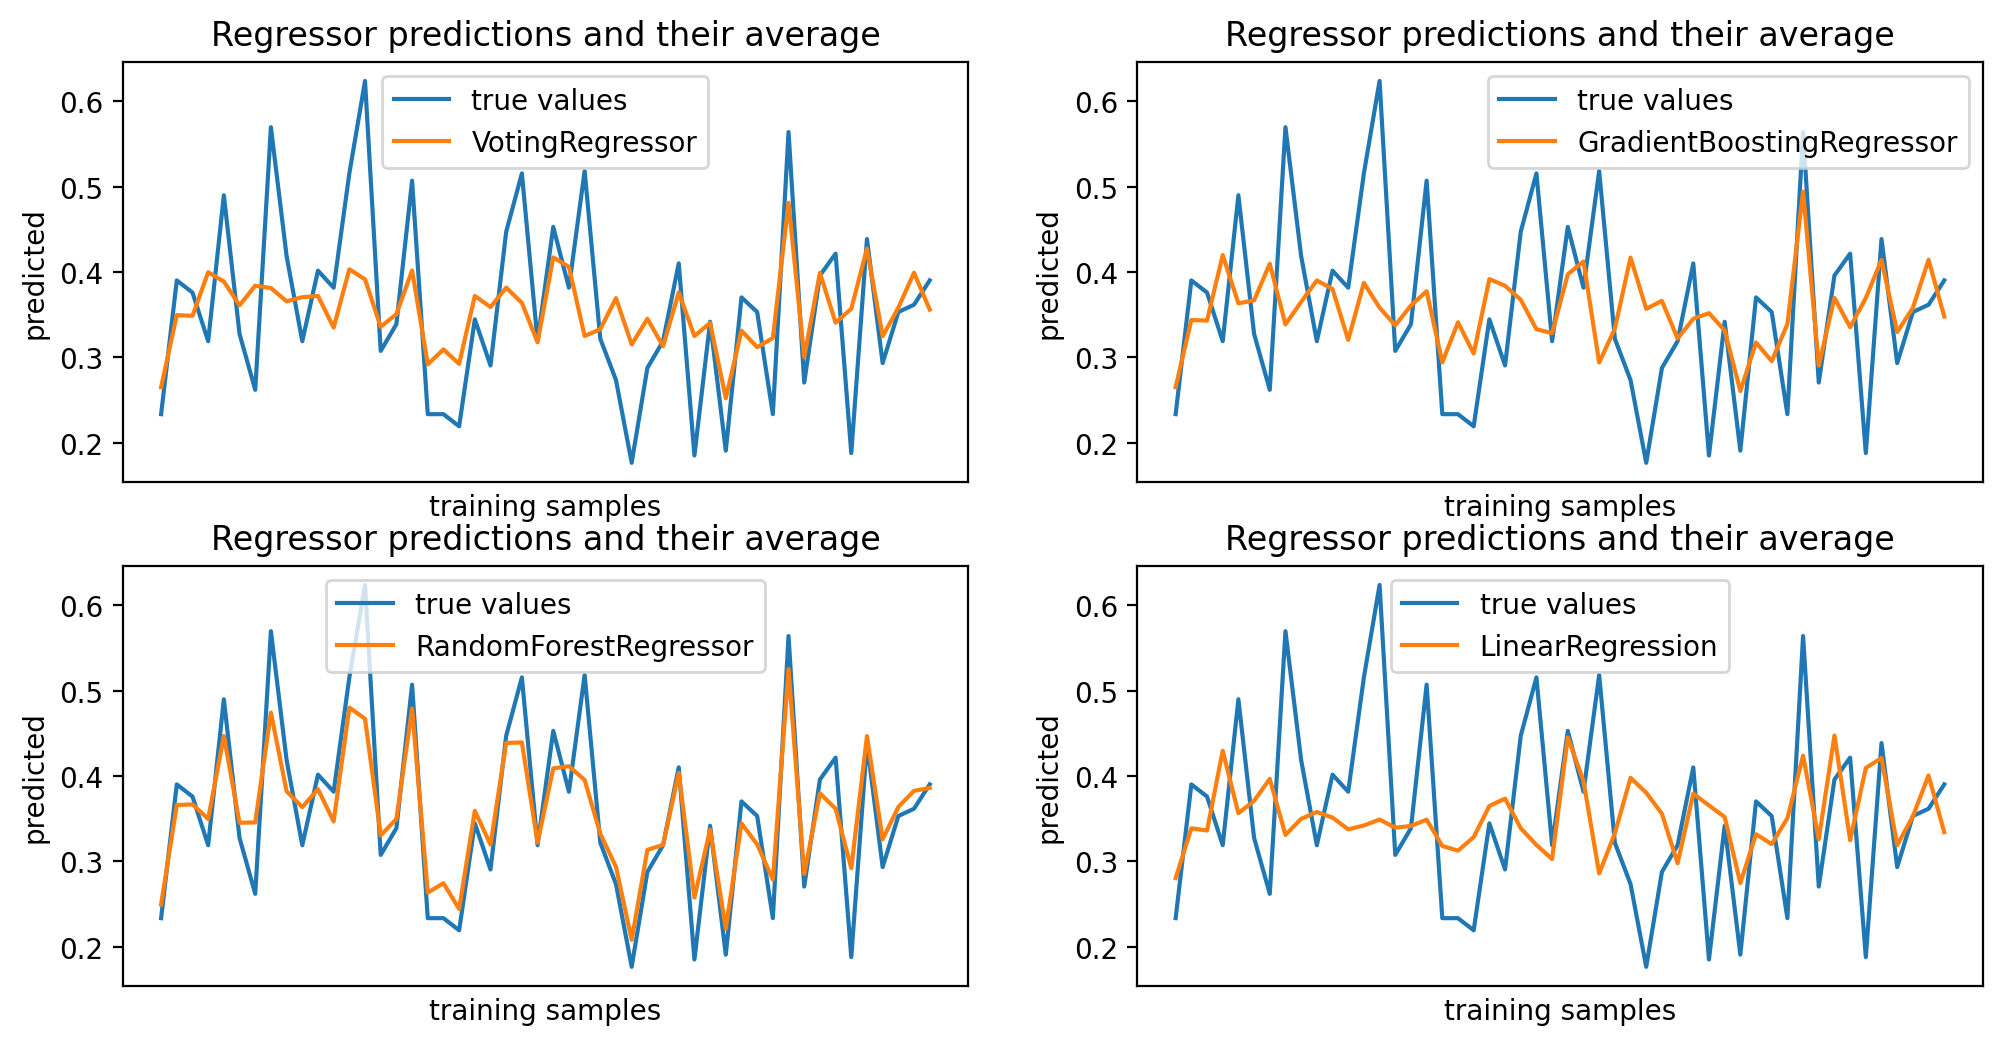

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(y[:50],label='true values')
plt.plot(pred4, ms=10, label="VotingRegressor")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")


plt.subplot(2,2,2)
plt.plot(y[:50],label='true values')
plt.plot(pred1, label="GradientBoostingRegressor")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.subplot(2,2,3)
plt.plot(y[:50],label='true values')
plt.plot(pred2, label="RandomForestRegressor")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")


plt.subplot(2,2,4)
plt.plot(y[:50],label='true values')
plt.plot(pred3, label="LinearRegression")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")



plt.show();


# PART 3

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [80]:
scaler=StandardScaler()

In [81]:
df

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0     106.0     77.0   39    195.0         0.0   70.0             0         0   
1     121.0     76.0   46    250.0         0.0   81.0             0         0   
2     127.5     70.0   48    245.0        20.0   80.0             0         0   
3     150.0    103.0   61    225.0        30.0   95.0             1         0   
4     130.0     85.0   46    285.0        23.0   84.0             0         0   
...     ...      ...  ...      ...         ...    ...           ...       ...   
4233  179.0     86.0   50    313.0         1.0   92.0             1         0   
4234  126.5     68.0   51    207.0        43.0   80.0             0         0   
4237  133.5    107.0   52    269.0         0.0   83.0             0         0   
4238  141.0     72.0   40    185.0         0.0   98.0             1         0   
4239  133.0     80.0   39    196.0        30.0   86.0             0         0   

      BPMeds  male  TenYearCHD  
0        0.0     1           0  
1        0.0     0           0  
2        0.0     1           0  
3        0.0     0           1  
4        0.0     0           0  
...      ...   ...         ...  
4233     0.0     1           1  
4234     0.0     1           0  
4237     0.0     0           0  
4238     0.0     1           0  
4239     0.0     0           0  

[3749 rows x 11 columns]

In [82]:
scaled_data=scaler.fit_transform(df.drop(columns='TenYearCHD'))

In [83]:
scaled_data

array([[-1.19569112, -0.20379862, -1.23347836, ..., -0.16639232,
        -0.17709252,  1.11635803],
       [-0.51515156, -0.24569832, -0.4167922 , ..., -0.16639232,
        -0.17709252, -0.89576997],
       [-0.22025109, -0.49709653, -0.1834533 , ..., -0.16639232,
        -0.17709252,  1.11635803],
       ...,
       [ 0.05196473,  1.05319239,  0.28322451, ..., -0.16639232,
        -0.17709252, -0.89576997],
       [ 0.39223451, -0.41329713, -1.11680891, ..., -0.16639232,
        -0.17709252,  1.11635803],
       [ 0.02928008, -0.07809952, -1.23347836, ..., -0.16639232,
        -0.17709252, -0.89576997]])

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca=PCA(n_components=4)

In [86]:
pca.fit(scaled_data)

PCA(n_components=4)

In [87]:
x_pca=pca.transform(scaled_data)

In [88]:
scaled_data.shape

(3749, 10)

In [89]:
x_pca.shape

(3749, 4)

In [90]:
x_pca

array([[-2.11998015,  0.18362771,  0.26699199, -0.73495943],
       [-0.72801143, -0.01288337, -1.22948279, -0.03344351],
       [-0.86257482, -0.40823392,  1.17021748,  0.70079591],
       ...,
       [ 0.17473824,  0.79096369, -1.23235566,  0.47003649],
       [ 0.81972546, -0.88663625,  0.98685195, -1.7981142 ],
       [-1.02408493, -0.28630966,  0.86557564, -1.03776914]])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'First principle component')

Text(0, 0.5, 'Second principle component')

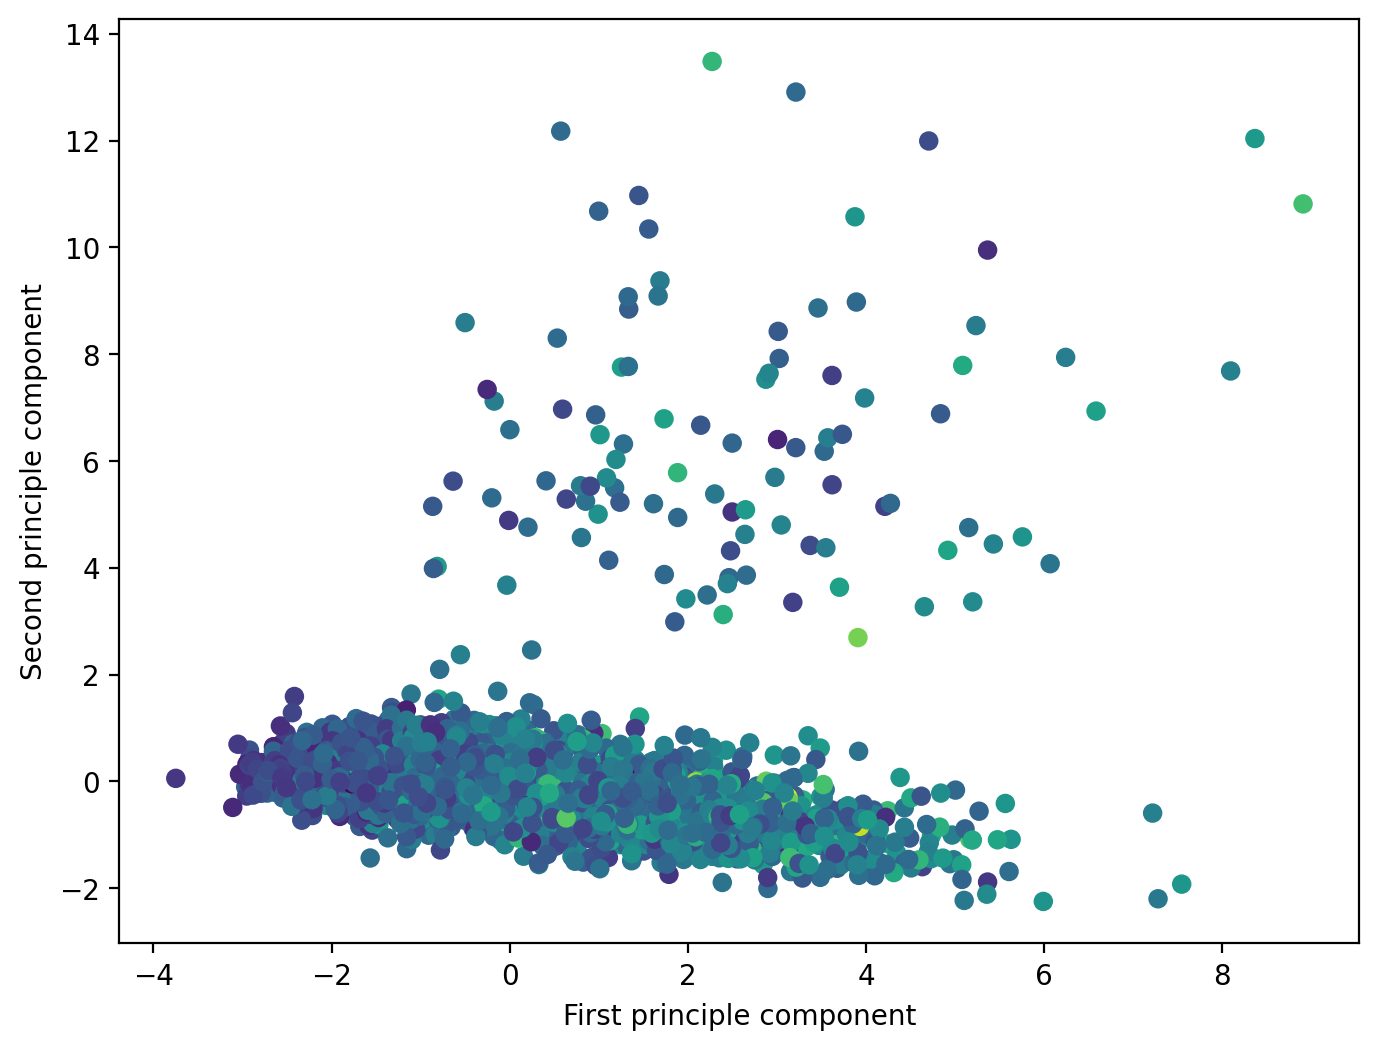

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['totChol'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'First principle component')

Text(0, 0.5, 'Second principle component')

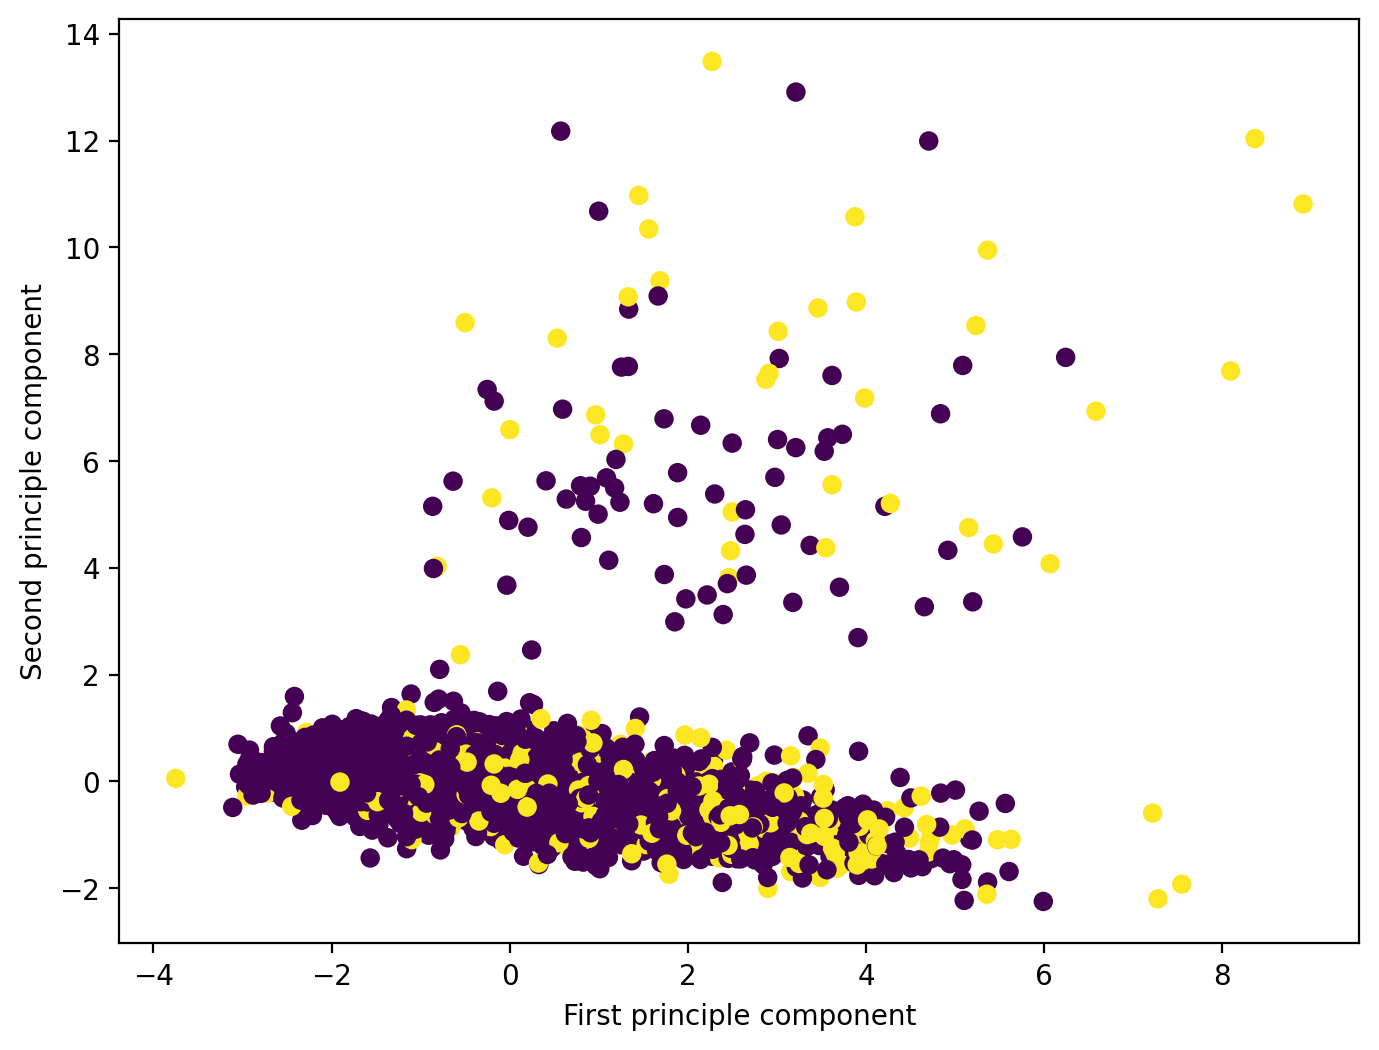

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['TenYearCHD'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [93]:
x_pca.shape

(3749, 4)

In [94]:
y_pca=df['TenYearCHD']

In [95]:
x_pca.shape

(3749, 4)

In [96]:
y_pca.shape

(3749,)

In [97]:
xtrain_pca,xtest_pca,ytrain_pca,ytest_pca=train_test_split(x_pca,np.array(y_pca),test_size=0.2)
print(xtrain_pca.shape)
print(ytrain_pca.shape)

(2999, 4)
(2999,)


In [98]:
classifier=LogisticRegression()
classifier.fit(xtrain_pca,ytrain_pca)

LogisticRegression()

In [99]:
pca_preds=classifier.predict(xtest_pca)

In [100]:
accuracy=accuracy_score(ytest_pca,pca_preds)
classifier_acc_pca.append(round(accuracy,3)*100)
accuracy

0.8546666666666667

In [101]:
f1_pca=f1_score(ytest_pca,pca_preds)
classifier_f1_pca.append(round(f1_pca,3)*100)
f1_pca

0.09917355371900825

In [102]:
recall_pca=recall_score(ytest_pca,pca_preds)
classifier_recall_pca.append(round(recall_pca,3)*100)
recall_pca

0.05357142857142857

In [103]:
precision_pca=precision_score(ytest_pca,pca_preds)
classifier_precision_pca.append(round(precision_pca,3)*100)
precision_pca

0.6666666666666666

In [104]:
confusion_matrix(ytest_pca,pca_preds)

array([[635,   3],
       [106,   6]], dtype=int64)

In [105]:
table

Accuracy    F1  Precision  Recall
Logistic Regression           65.7  37.2       26.0    65.0
SupportVectorMachine          64.8  37.7       26.1    68.4
Decision Tree Classifier      70.8  51.7       34.8   100.0
K nearest Neighbors           80.0  46.8       40.0    56.4

In [106]:
PCAtable=pd.DataFrame()

In [107]:
PCAtable.index = ['PCA-LR']

In [108]:
PCAtable

Empty DataFrame
Columns: []
Index: [PCA-LR]

In [109]:
PCAtable

Empty DataFrame
Columns: []
Index: [PCA-LR]

# Applying the model <a name="paragraph7"></a>

# def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()